<h1><center>Exploratory Data Analysis of San Francisco's Building Permits</center></h1>
<h2>Introduction</h2>
<p>The goal of this report is to create visualizations from the dataset, get a better sense of the data, identify trends and correlations, and hopefully, form new and interesting questions that can uncover new insights. I will be using plotting tools from matplotlib and seaborn to accomplish this task. My hope, is that I can get a clear picture of San Francisco's real estate development.</p> 

In [1]:
import datetime as dt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.style as style

%matplotlib inline 

In [2]:
df = pd.read_csv(filepath_or_buffer='Building_Permits_Cleaned.csv',
                 header=0, low_memory=False, index_col='Unnamed: 0')

### Converting appropriate columns

In [3]:
def to_category(columns, dataframe):
    """Convert a list of columns, from a dataframe, to a category datatype"""
    for column in columns: 
        dataframe[column] = dataframe[column].astype('category')

def to_integer(columns, dataframe):
    """Convert columns from a dataframe to an int64 datatype"""
    for column in columns: 
        dataframe[column] = dataframe[column].astype('int64')

In [4]:
cols = ['permit_creation_date', 'current_status_date','filed_date',
        'issued_date', 'completed_date', 'first_construction_document_date',
        'permit_expiration_date']

for col in cols:
    df[col] = pd.to_datetime(df[col])

In [5]:
columns = ['permit_type_definition', 'current_status', 'fire_only_permit', 
           'existing_use', 'proposed_use', 'existing_construction_type', 'proposed_construction_type',
           'existing_construction_type_description', 'proposed_construction_type_description', 
           'tidf_compliance', 'site_permit', 'neighborhoods', 'zipcode',
           'time_frame']
to_category(columns=columns, dataframe=df)

## EDA 
### Can we count something interesting?
Let's take a look at how many permits we have for each category

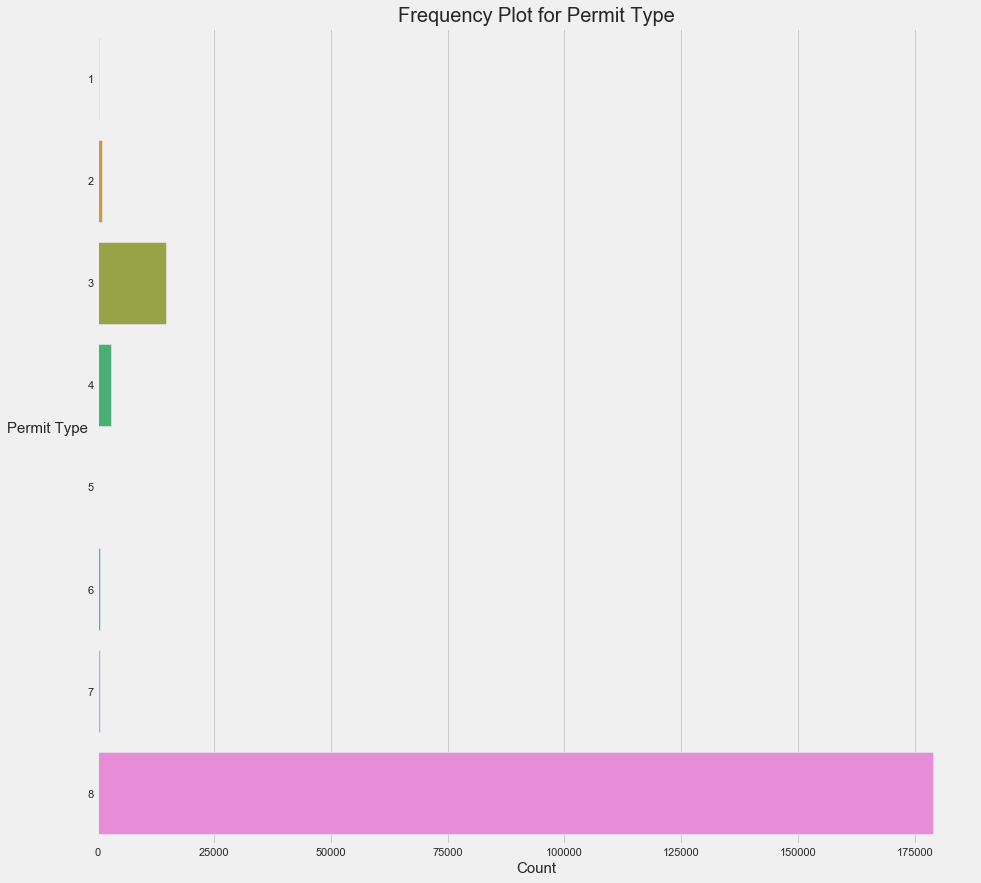

In [7]:
sb.set(style='whitegrid')
style.use('fivethirtyeight')
plt.figure(figsize=(14,14))
_ = sb.countplot(y=df.permit_type, data=df)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Permit Type', fontsize=15, rotation=0, labelpad=40)
_ = plt.title('Frequency Plot for Permit Type', fontsize=20)
plt.show()

From the graph we see that a majority of permits filed were of permit type 8, which is an otc alterations permit. A distant second is of permit type 3, which is an additions alterations or repairs permit.  
  
Let's look at how many of these permits were filed in each neighborhood, zip code, and time frame.

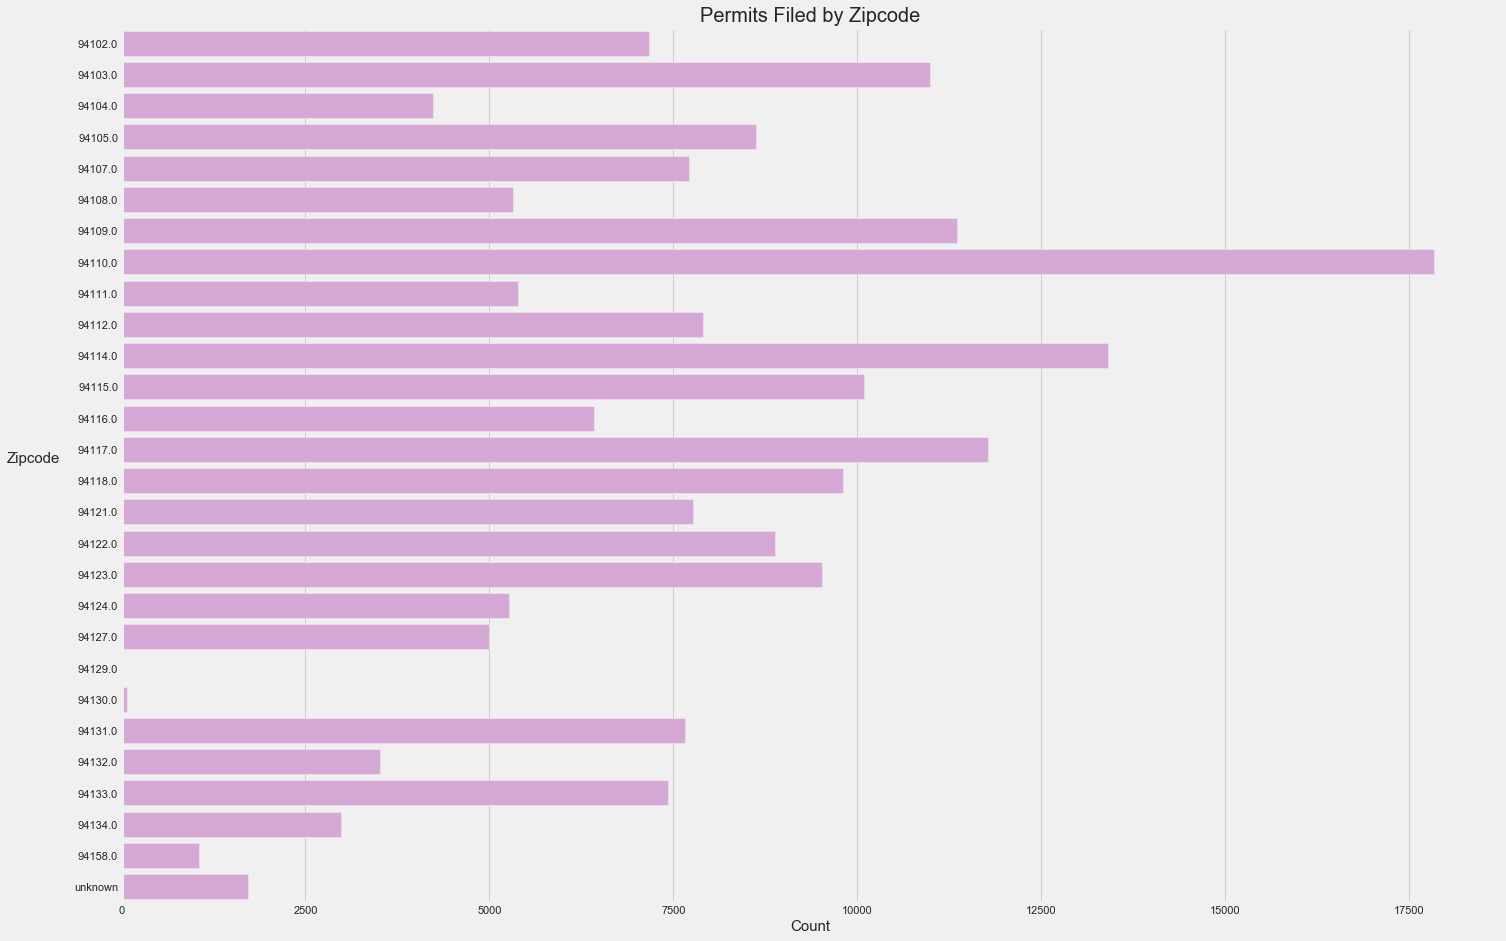

In [8]:
plt.figure(figsize=(22, 15))
_ = sb.countplot(y=df.zipcode, data=df, color='plum')
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Zipcode', fontsize=15, rotation=0, labelpad=40)
_ = plt.title('Permits Filed by Zipcode', fontsize=20)
plt.show()

Interesting facts from this plot: 94110 had the most permits filed while 94129 and 94130 had the least. Additionally, at least 3000 permits were filed in each of the zipcodes from 2013 to 2018. 

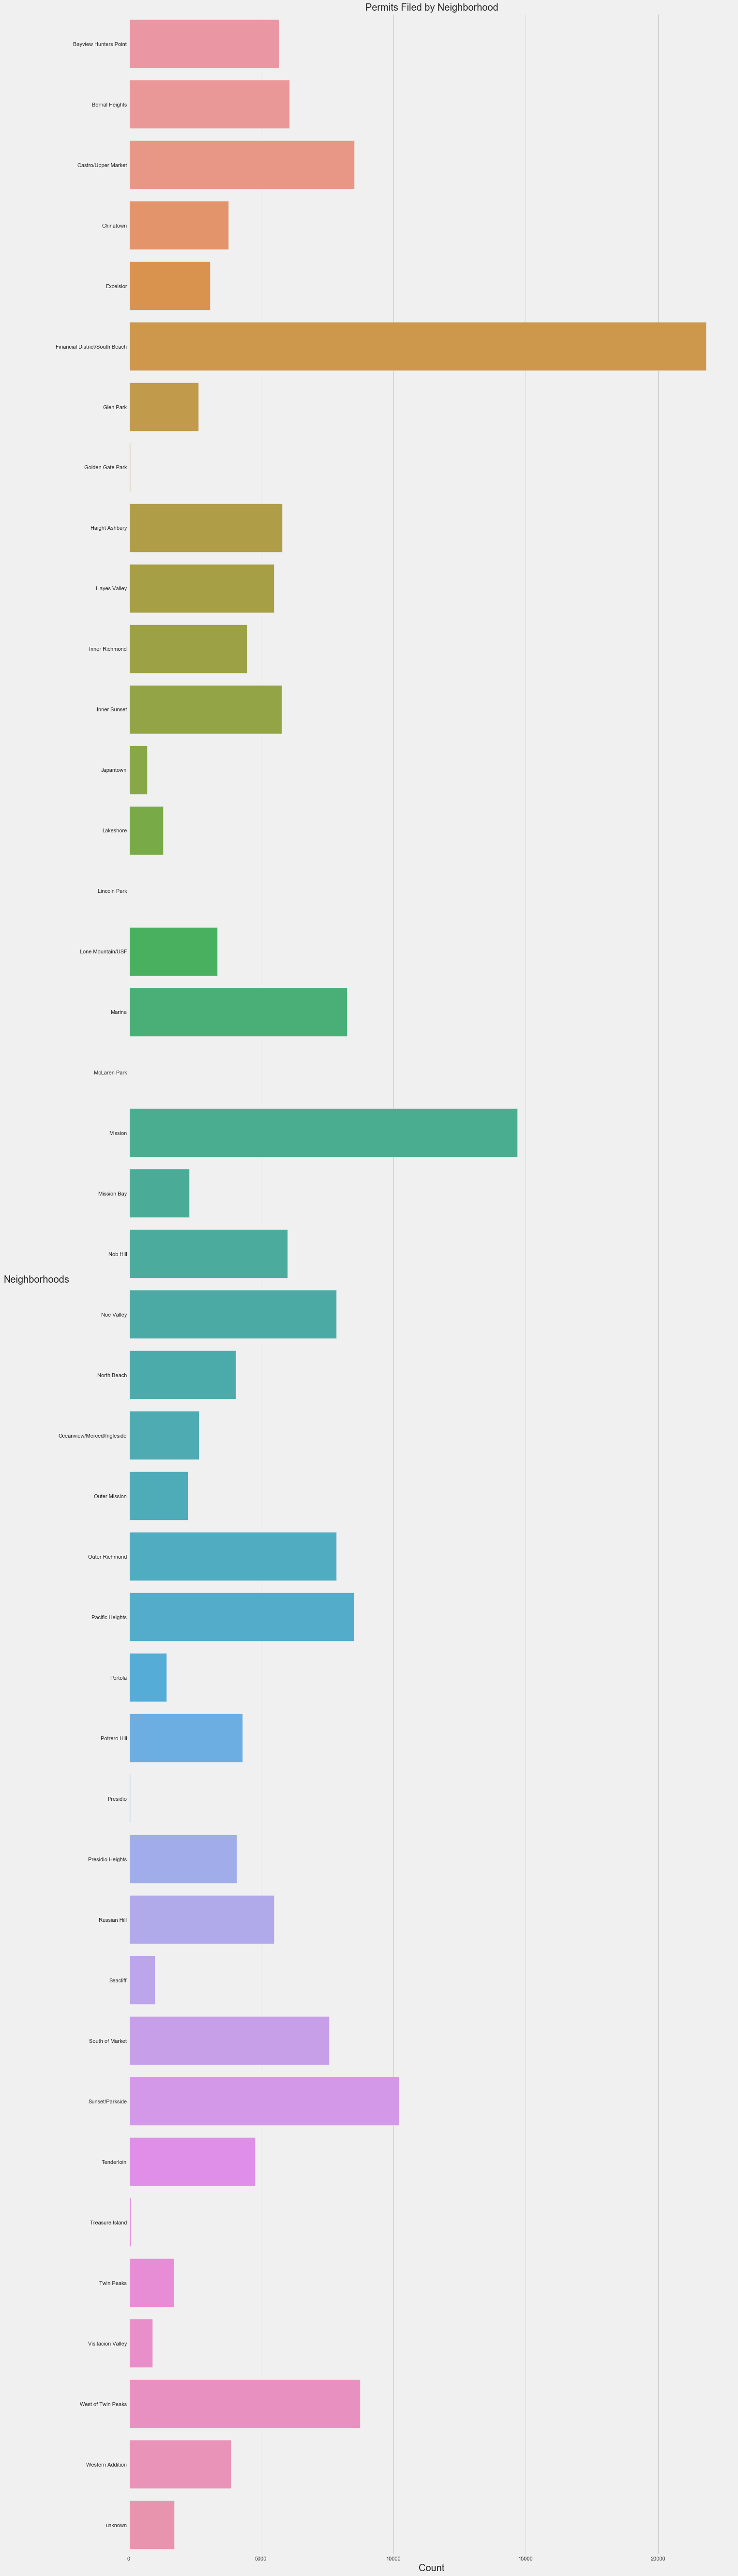

In [9]:
plt.figure(figsize=(20, 90))
_ = sb.countplot(y=df.neighborhoods, data=df)
_ = plt.xlabel('Count', fontsize=20)
_ = plt.ylabel('Neighborhoods', fontsize=20, rotation=0, labelpad=40)
_ = plt.title('Permits Filed by Neighborhood', fontsize=20)
plt.show()

The Financial District/South Beach neighborhood had the most permits filed among the neighborhoods. Would be interesting to see the breakdown of permits filed in that neighborhood. 

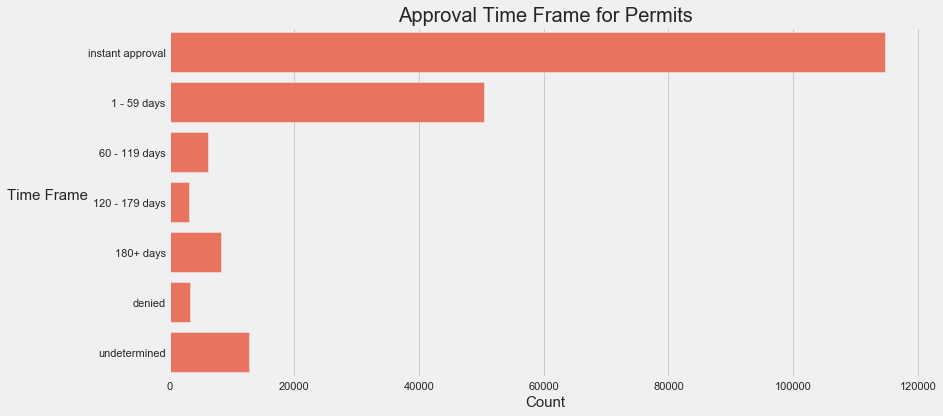

In [10]:
order = ["instant approval", "1 - 59 days", "60 - 119 days", "120 - 179 days", "180+ days", "denied", "undetermined"]
plt.figure(figsize=(12, 6))
_ = sb.countplot(y=df.time_frame, data=df, color='tomato', order=order)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Time Frame', fontsize=15, rotation=0, labelpad=40)
_ = plt.title('Approval Time Frame for Permits', fontsize=20)
plt.show()

Over 50% of the permits were approved the same day. Would be interesting to see the breakdown of what kind of permits and how many of each permit type are in that instant approval category. 

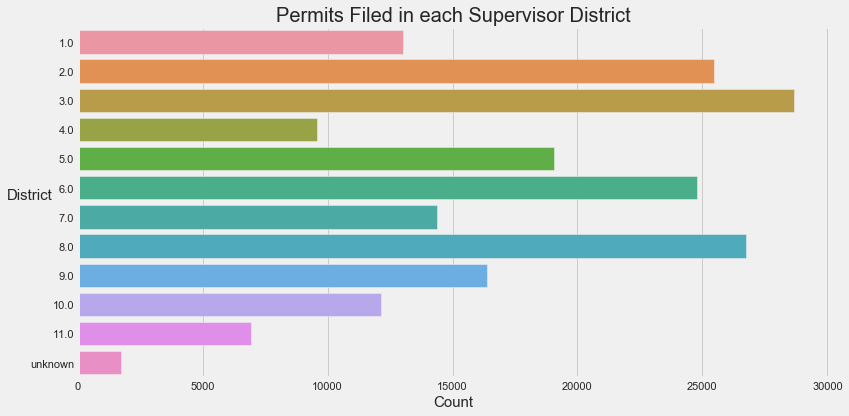

In [11]:
d = ["1.0", "2.0", "3.0", "4.0", "5.0", "6.0", "7.0", "8.0", "9.0", "10.0", "11.0", "unknown"]
plt.figure(figsize=(12, 6))
_ = sb.countplot(y=df.supervisor_district, data=df, order=d)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('District', fontsize=15, rotation=0, labelpad=0)
_ = plt.title('Permits Filed in each Supervisor District', fontsize=20)
plt.show()

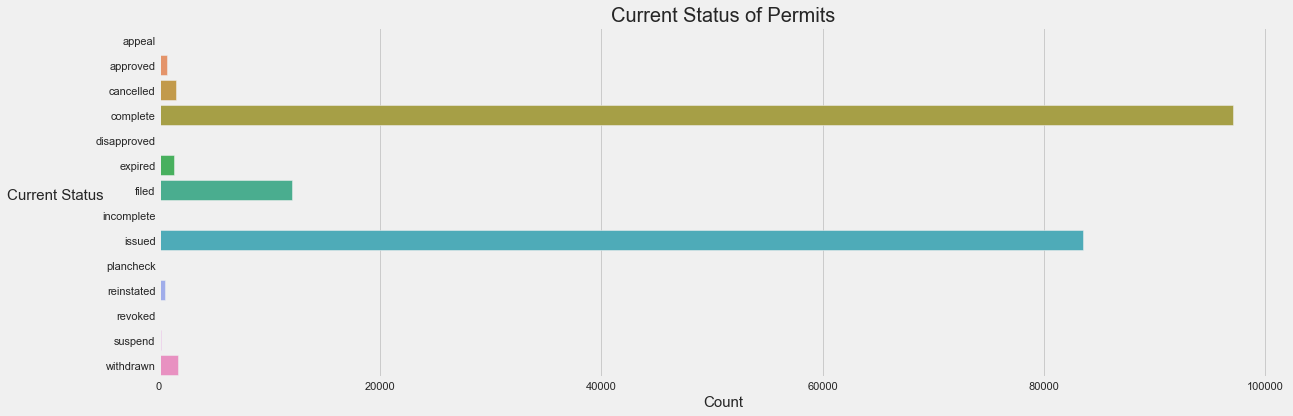

In [12]:
dic = dict(df.current_status.value_counts(sort=False))
category = list(dic.keys())
values = list(dic.values())

plt.figure(figsize=(18, 6))
_ = sb.barplot(x=values, y=category, orient="h")
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Current Status', fontsize=15, rotation=0, labelpad=40)
_ = plt.title('Current Status of Permits', fontsize=20)
plt.show()

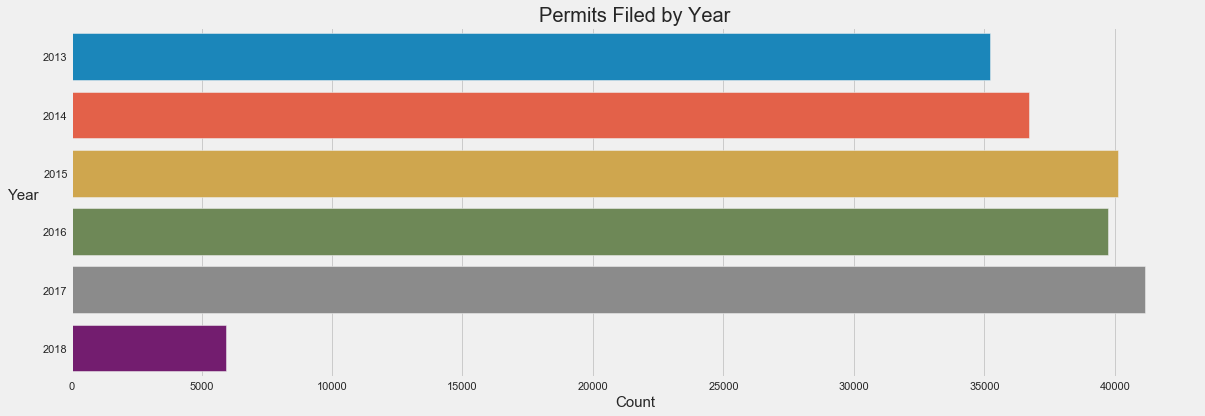

In [13]:
dic = df.filed_date.dt.year

plt.figure(figsize=(18, 6))
_ = sb.countplot(y=dic)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Year', fontsize=15, rotation=0, labelpad=20)
_ = plt.title('Permits Filed by Year', fontsize=20)
plt.show()

There is annual growth in permits filed each year. 

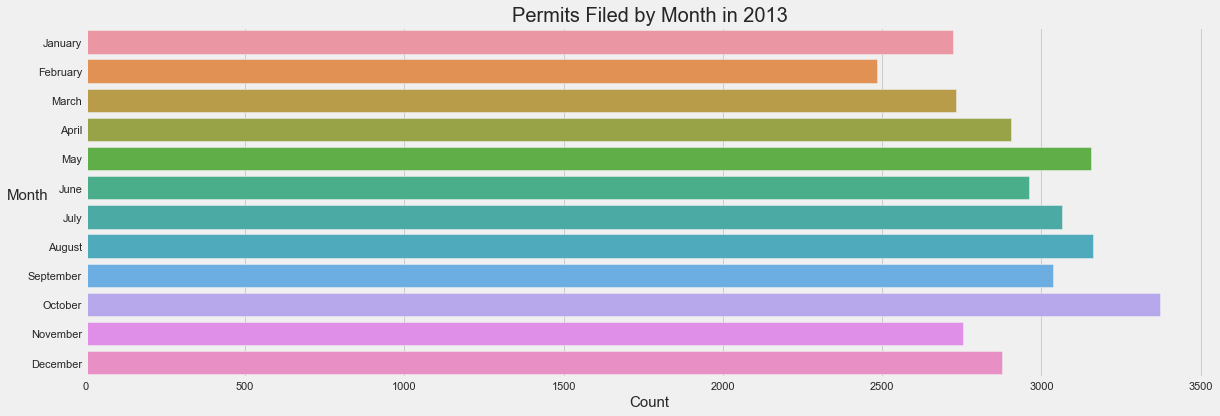

In [14]:
dic = df[df.filed_date.dt.year == 2013].filed_date.dt.month
objects = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 6))
_ = sb.countplot(y=dic)
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Month', fontsize=15, rotation=0, labelpad=0)
_ = plt.title('Permits Filed by Month in 2013', fontsize=20)
plt.show()

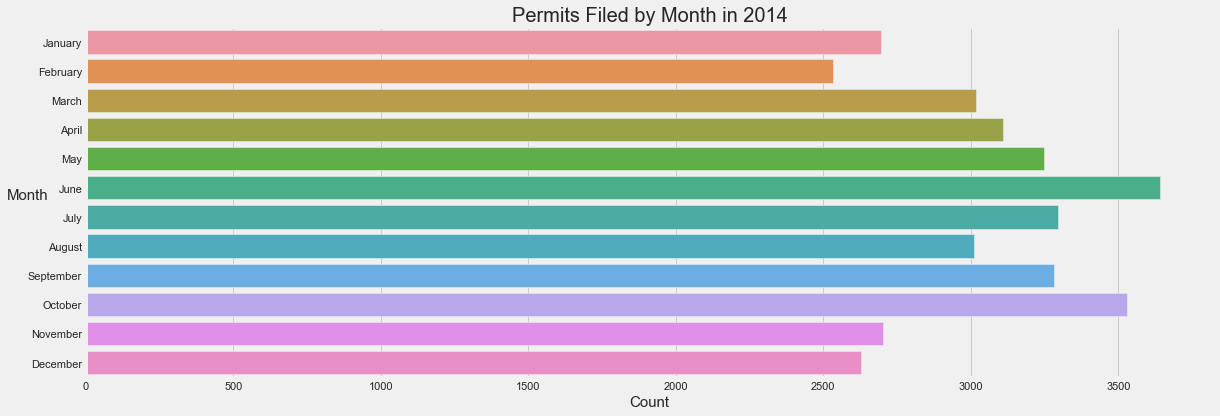

In [15]:
dic = df[df.filed_date.dt.year == 2014].filed_date.dt.month
objects = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 6))
_ = sb.countplot(y=dic)
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Month', fontsize=15, rotation=0, labelpad=0)
_ = plt.title('Permits Filed by Month in 2014', fontsize=20)
plt.show()

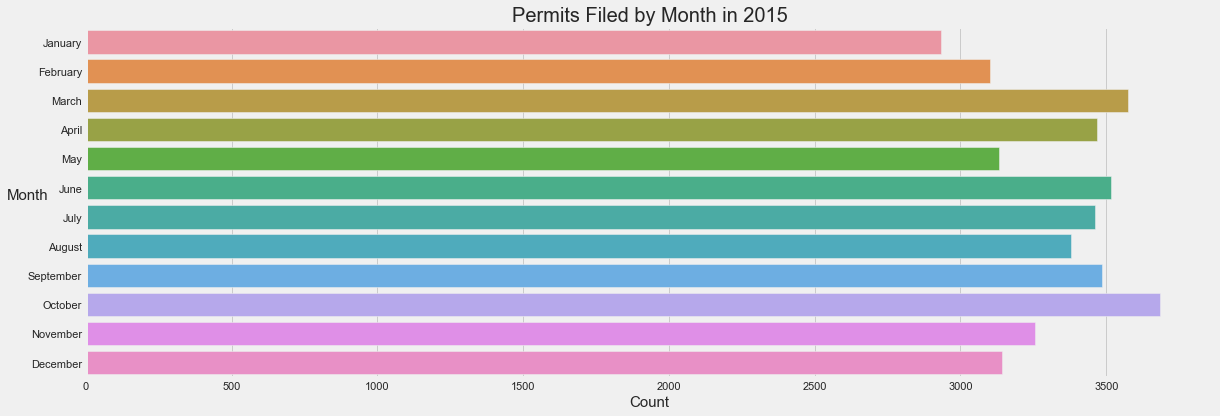

In [16]:
dic = df[df.filed_date.dt.year == 2015].filed_date.dt.month
objects = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 6))
_ = sb.countplot(y=dic)
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Month', fontsize=15, rotation=0, labelpad=0)
_ = plt.title('Permits Filed by Month in 2015', fontsize=20)
plt.show()

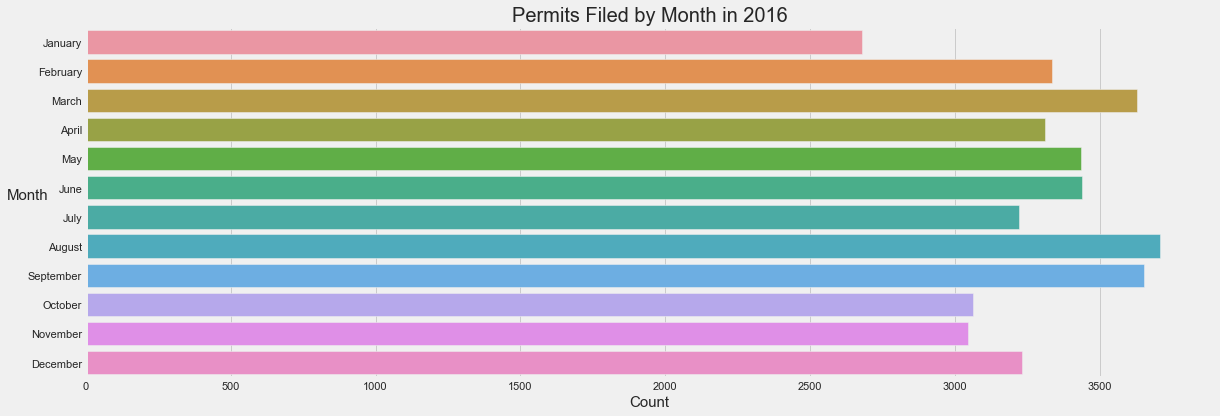

In [17]:
dic = df[df.filed_date.dt.year == 2016].filed_date.dt.month
objects = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 6))
_ = sb.countplot(y=dic)
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Month', fontsize=15, rotation=0, labelpad=0)
_ = plt.title('Permits Filed by Month in 2016', fontsize=20)
plt.show()

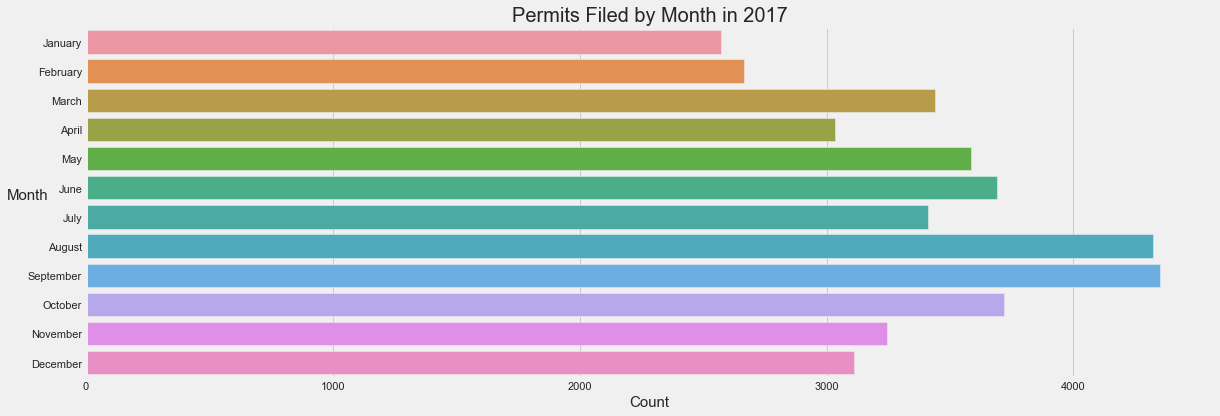

In [18]:
dic = df[df.filed_date.dt.year == 2017].filed_date.dt.month
objects = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 6))
_ = sb.countplot(y=dic)
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Month', fontsize=15, rotation=0, labelpad=0)
_ = plt.title('Permits Filed by Month in 2017', fontsize=20)
plt.show()

From 2013 to 2017, overall there is a monthly increase in permits filed. 

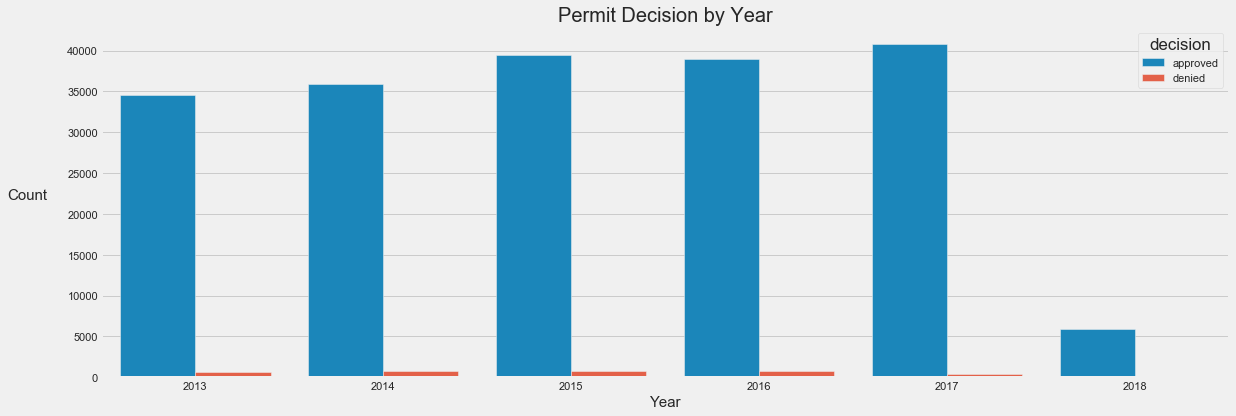

In [19]:
plt.figure(figsize=(18, 6))
_ = sb.countplot(x=df.filed_date.dt.year, hue=df.decision, data=df)
_ = plt.xlabel('Year', fontsize=15)
_ = plt.ylabel('Count', fontsize=15, rotation=0, labelpad=40)
_ = plt.title('Permit Decision by Year', fontsize=20)
plt.show()

There has been a steady increase in permits approved every year. The biggest increase on a annual basis happens in 2014 and 2015. 

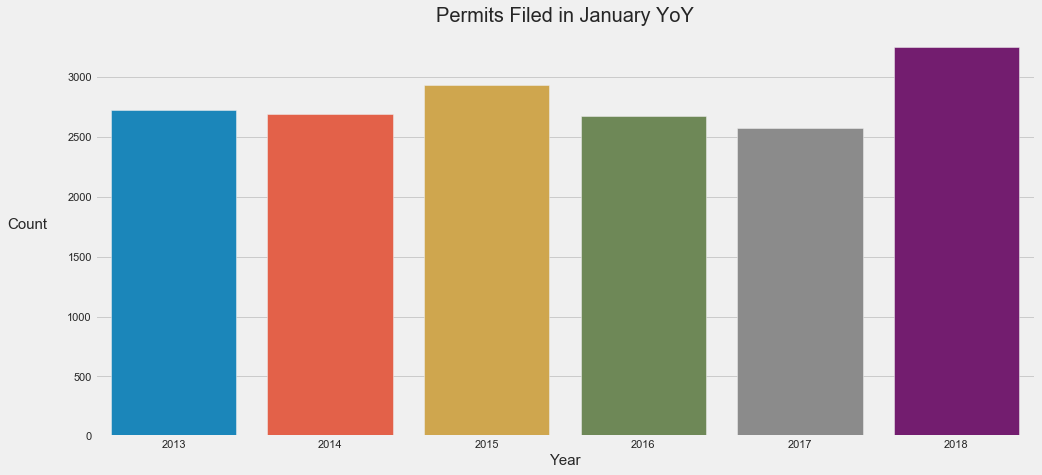

In [20]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 1]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in January YoY", fontsize=20)
plt.show()

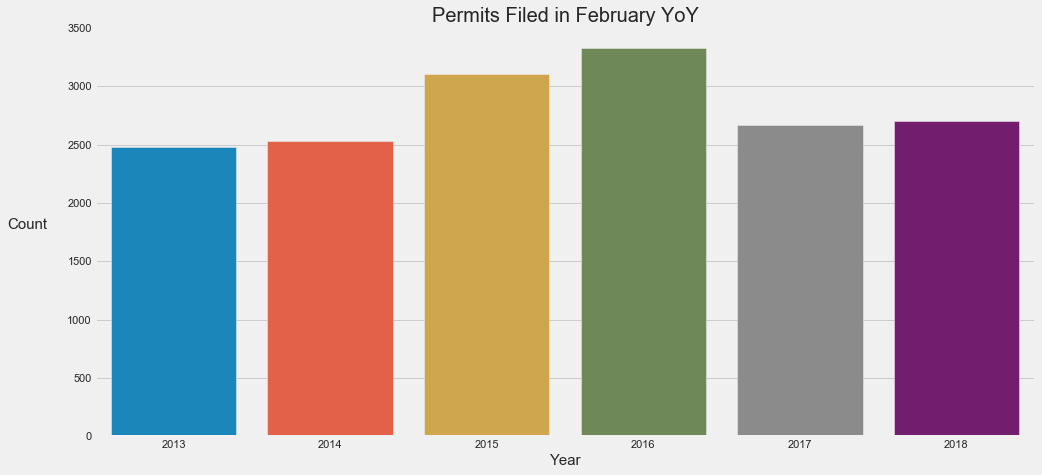

In [21]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 2]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in February YoY", fontsize=20)
plt.show()

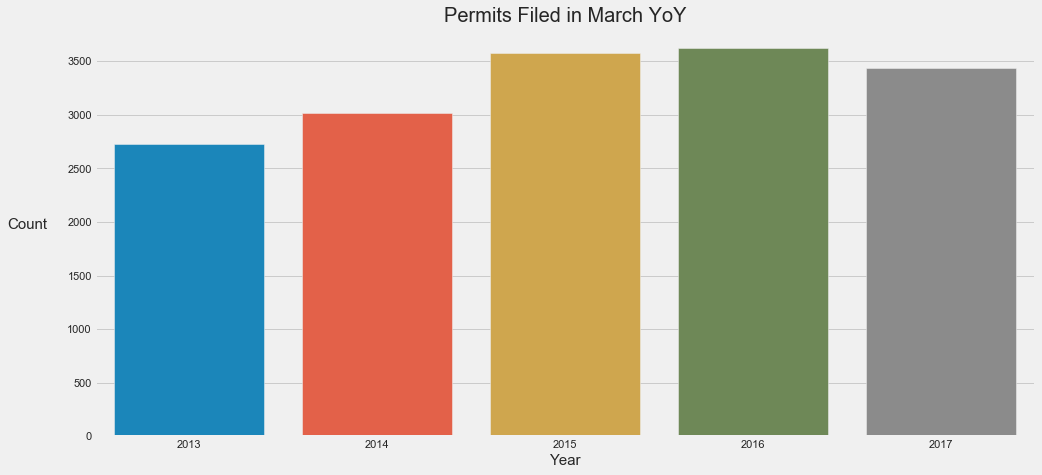

In [22]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 3]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in March YoY", fontsize=20)
plt.show()

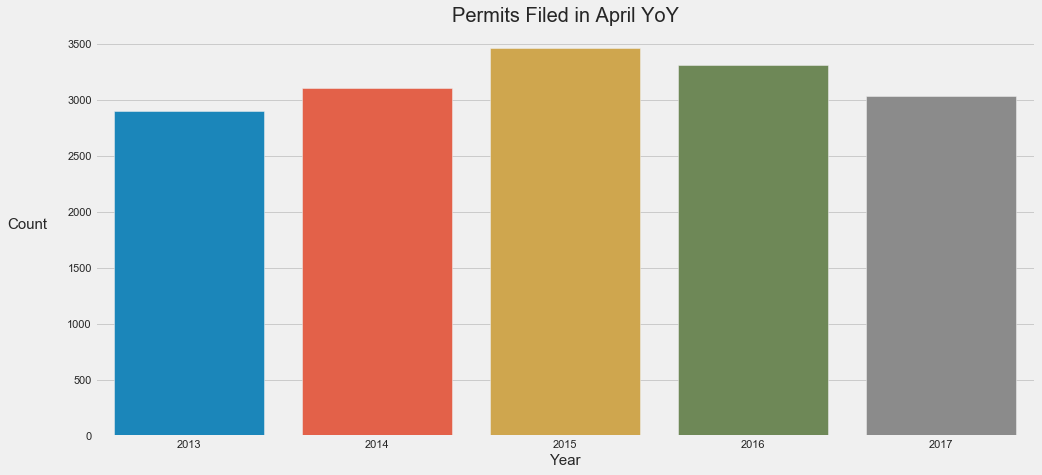

In [23]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 4]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in April YoY", fontsize=20)
plt.show()

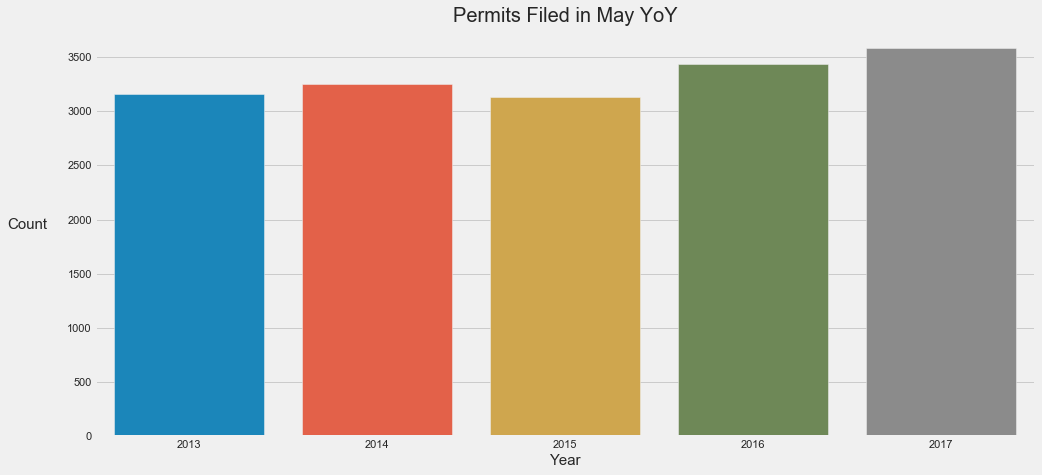

In [24]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 5]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in May YoY", fontsize=20)
plt.show()

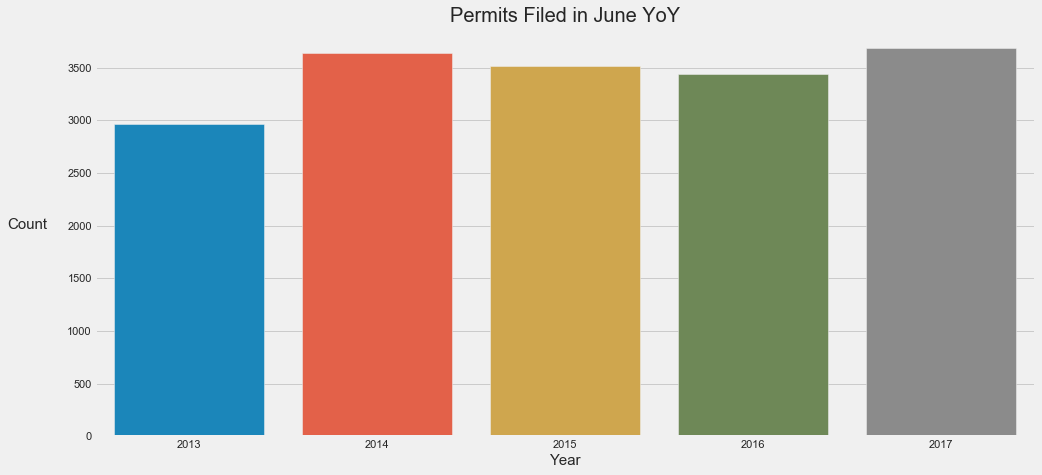

In [25]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 6]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in June YoY", fontsize=20)
plt.show()

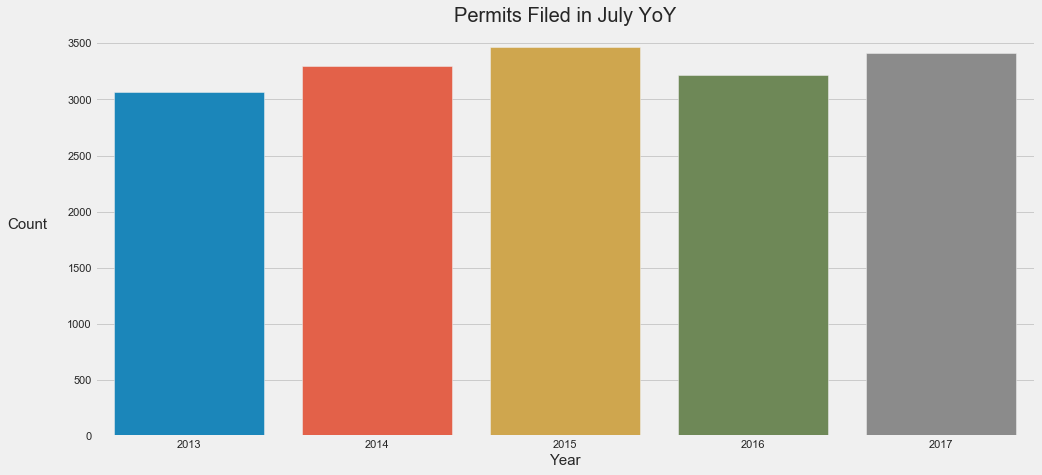

In [26]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 7]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in July YoY", fontsize=20)
plt.show()

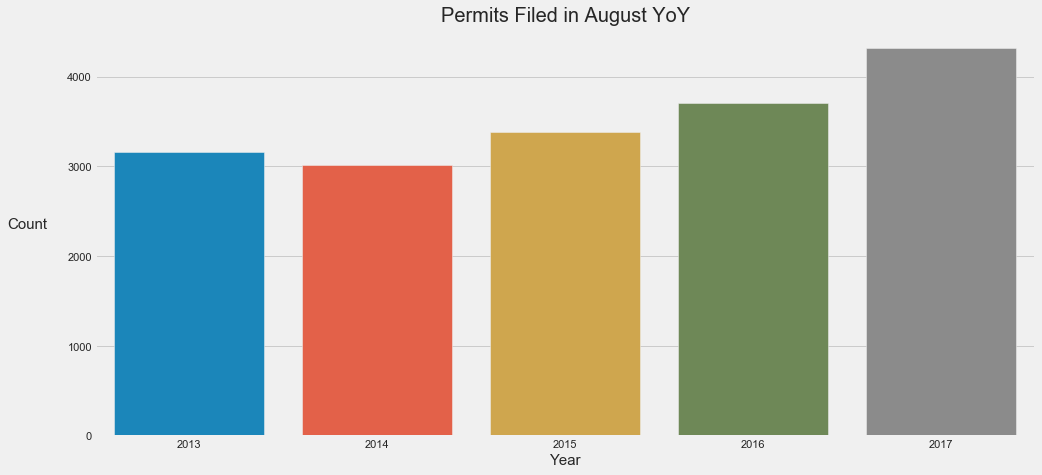

In [27]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 8]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in August YoY", fontsize=20)
plt.show()

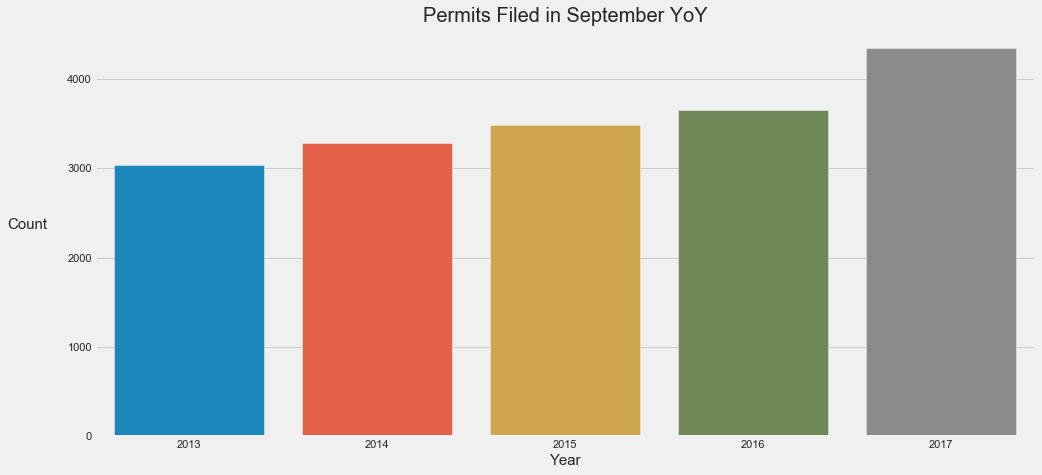

In [28]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 9]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in September YoY", fontsize=20)
plt.show()

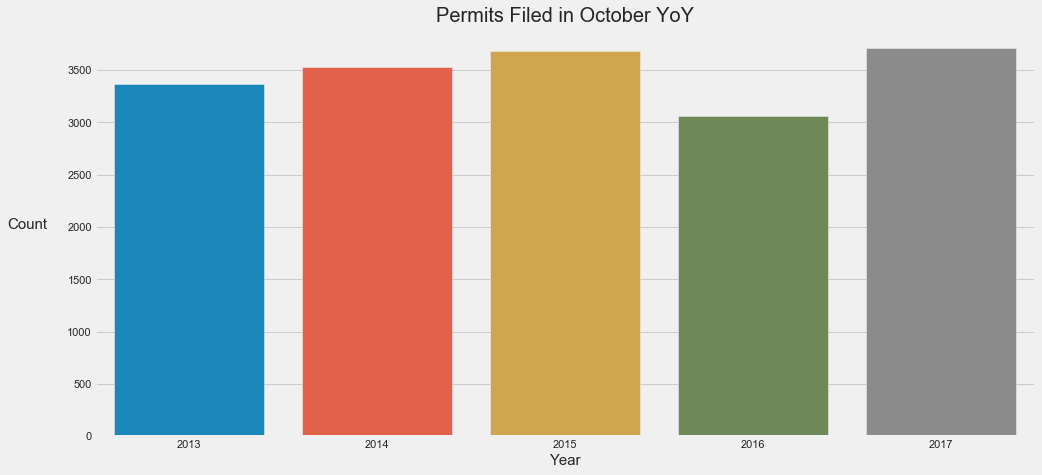

In [29]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 10]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in October YoY", fontsize=20)
plt.show()

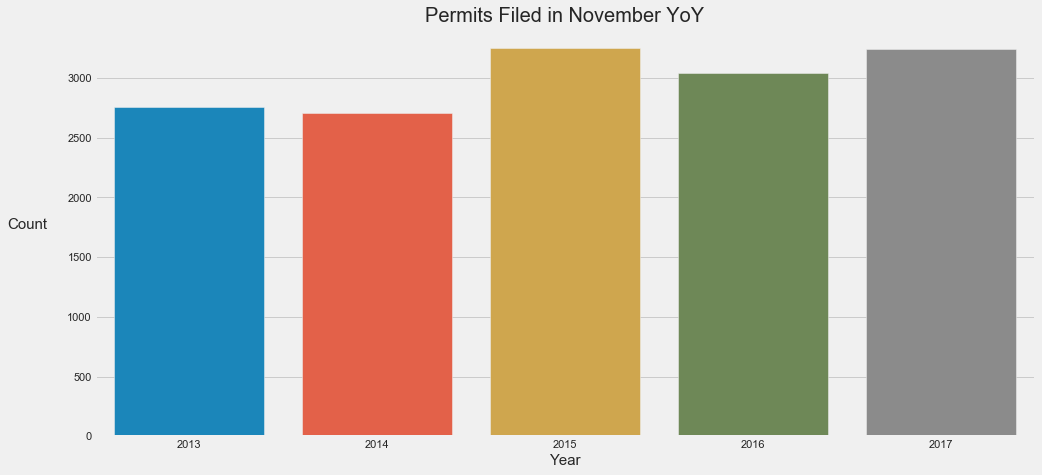

In [30]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 11]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in November YoY", fontsize=20)
plt.show()

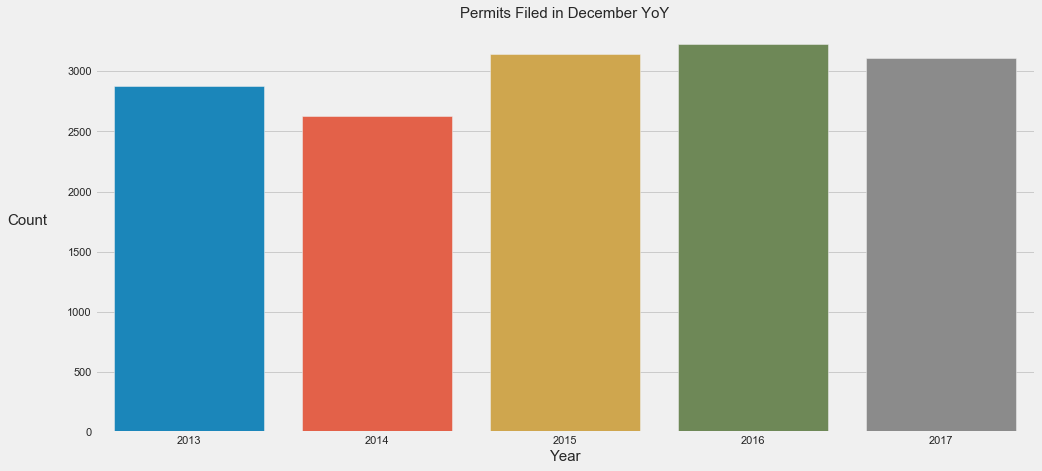

In [31]:
plt.figure(figsize=(15, 7))
data = df[df.filed_date.dt.month == 12]
_ = sb.countplot(x=data.filed_date.dt.year, data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Count", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Permits Filed in December YoY", fontsize=15)
plt.show()

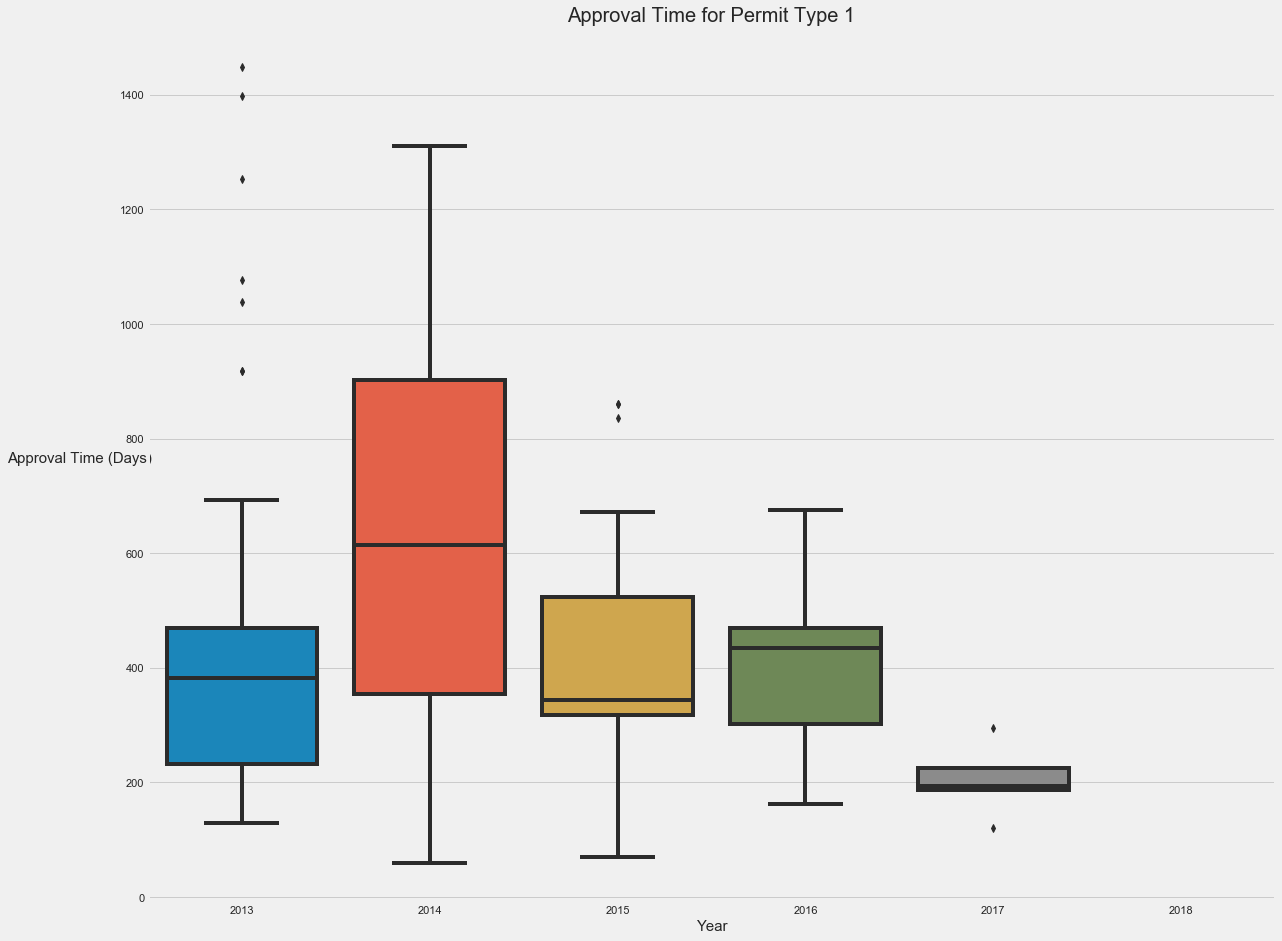

In [32]:
data = df[df.permit_type == 1]
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x=data.filed_date.dt.year, y='time_range', data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Approval Time for Permit Type 1", fontsize=20)
plt.show()

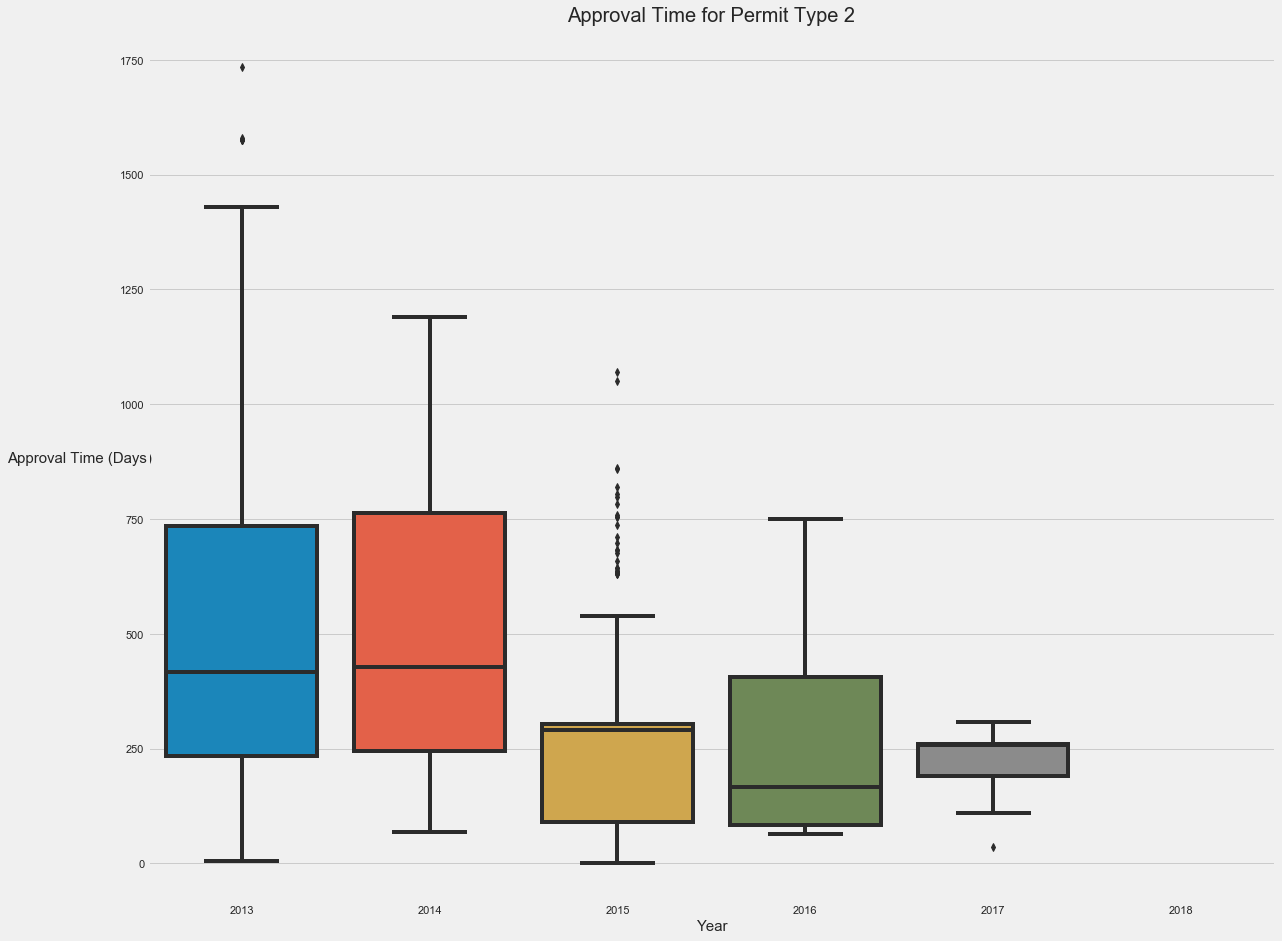

In [33]:
data = df[df.permit_type == 2]
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x=data.filed_date.dt.year, y='time_range', data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Approval Time for Permit Type 2", fontsize=20)
plt.show()

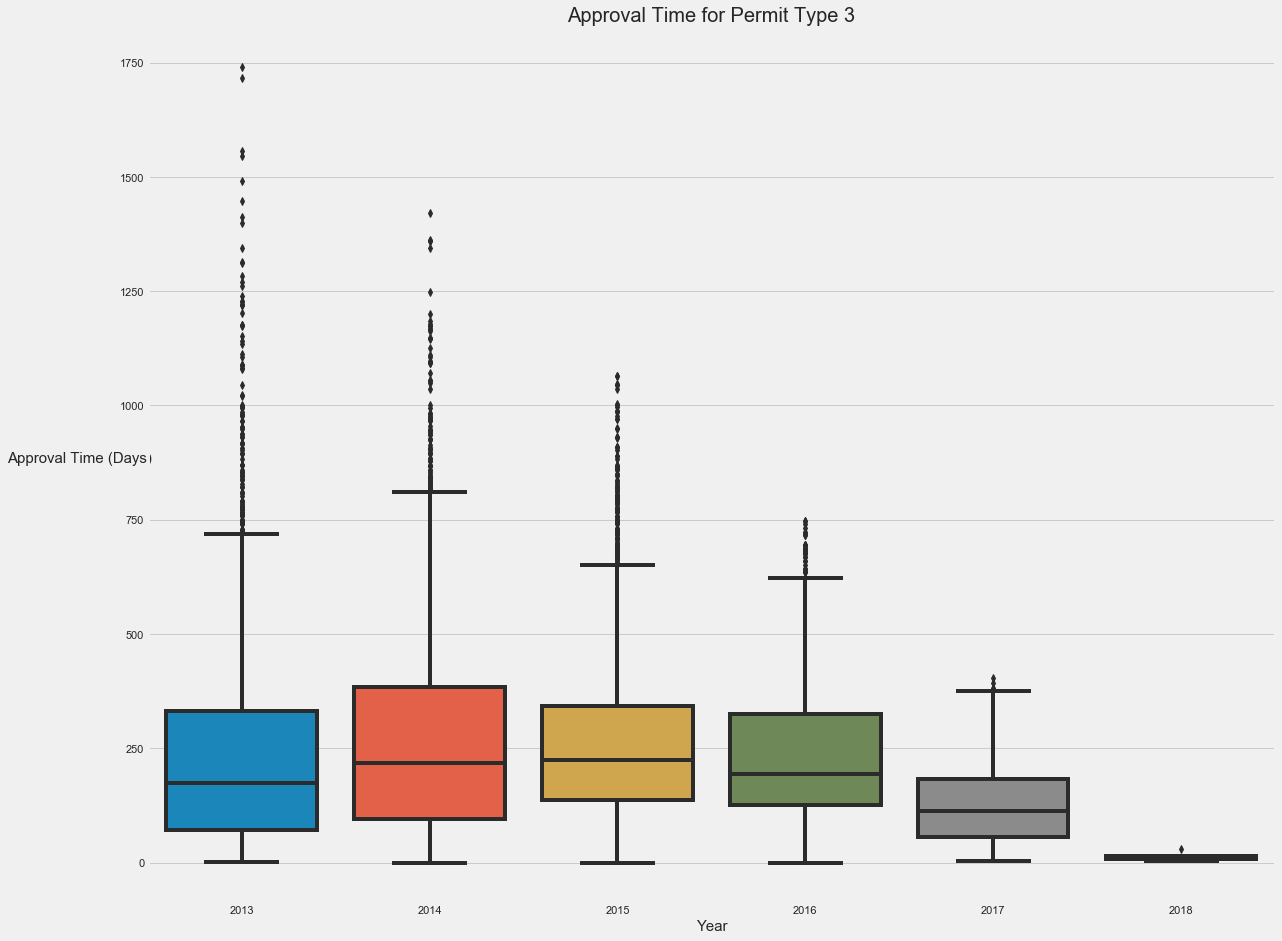

In [34]:
data = df[df.permit_type == 3]
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x=data.filed_date.dt.year, y='time_range', data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Approval Time for Permit Type 3", fontsize=20)
plt.show()

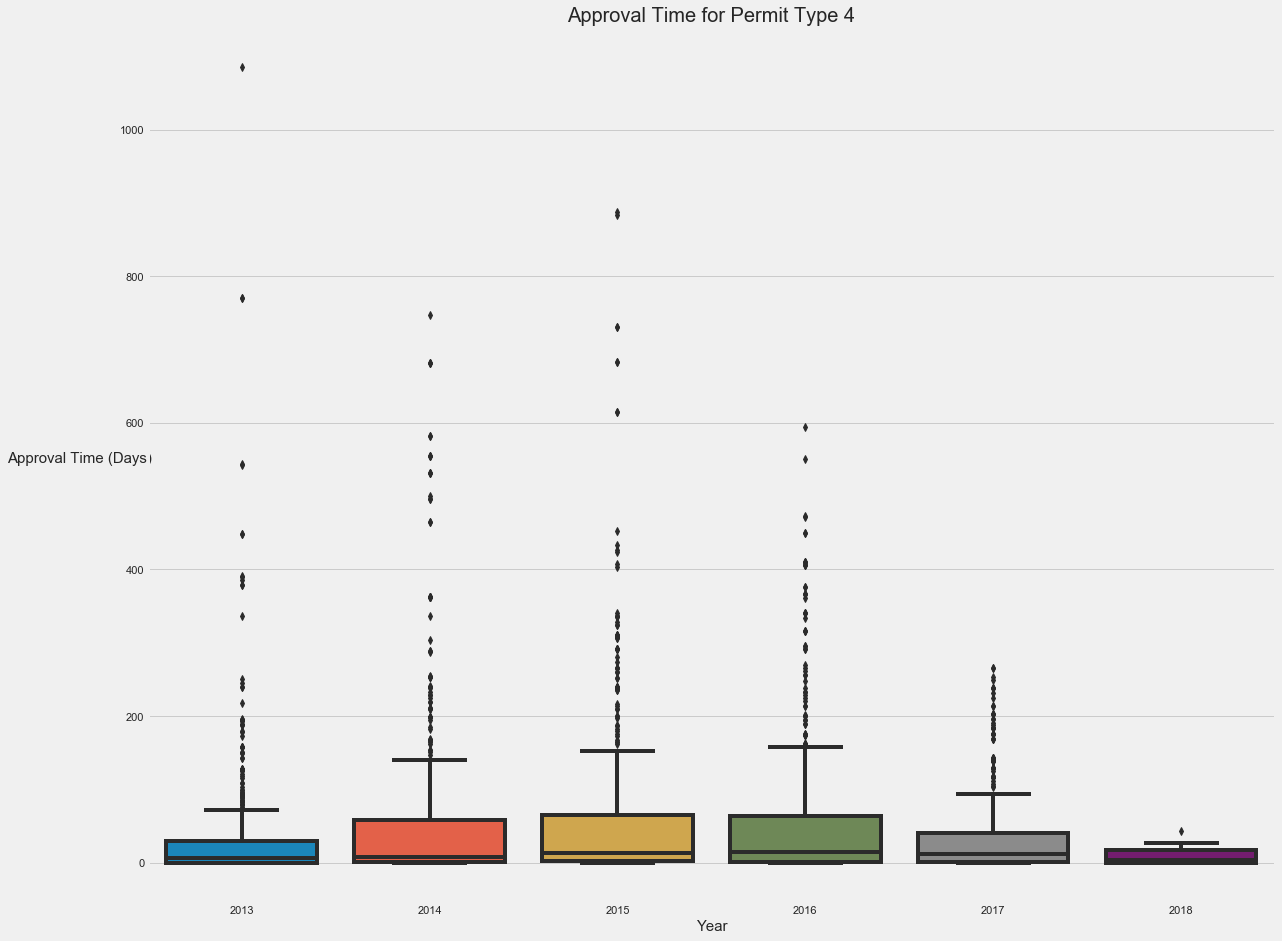

In [35]:
data = df[df.permit_type == 4]
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x=data.filed_date.dt.year, y='time_range', data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Approval Time for Permit Type 4", fontsize=20)
plt.show()

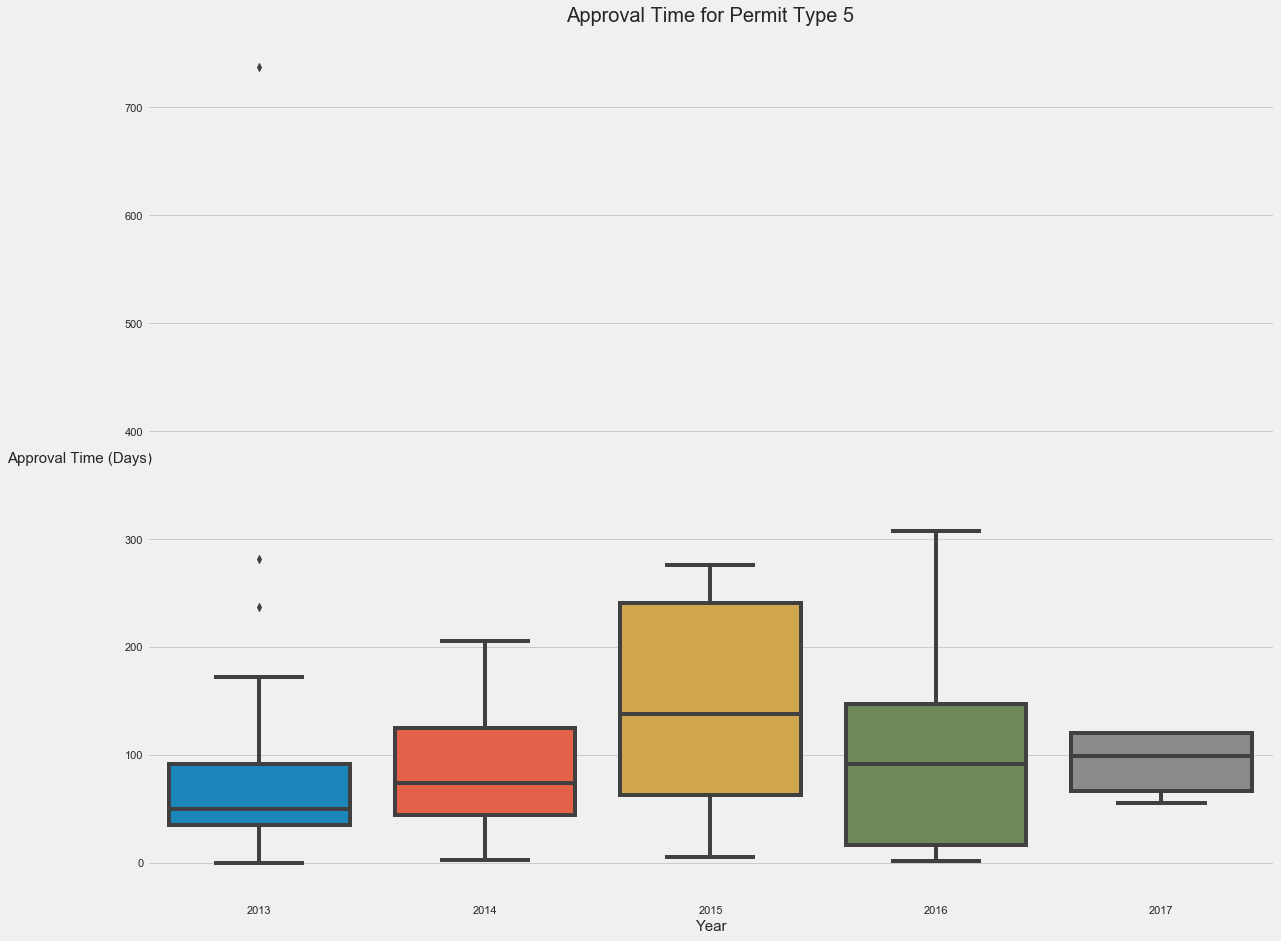

In [36]:
data = df[df.permit_type == 5]
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x=data.filed_date.dt.year, y='time_range', data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=45)
_ = plt.title(s="Approval Time for Permit Type 5", fontsize=20)
plt.show()

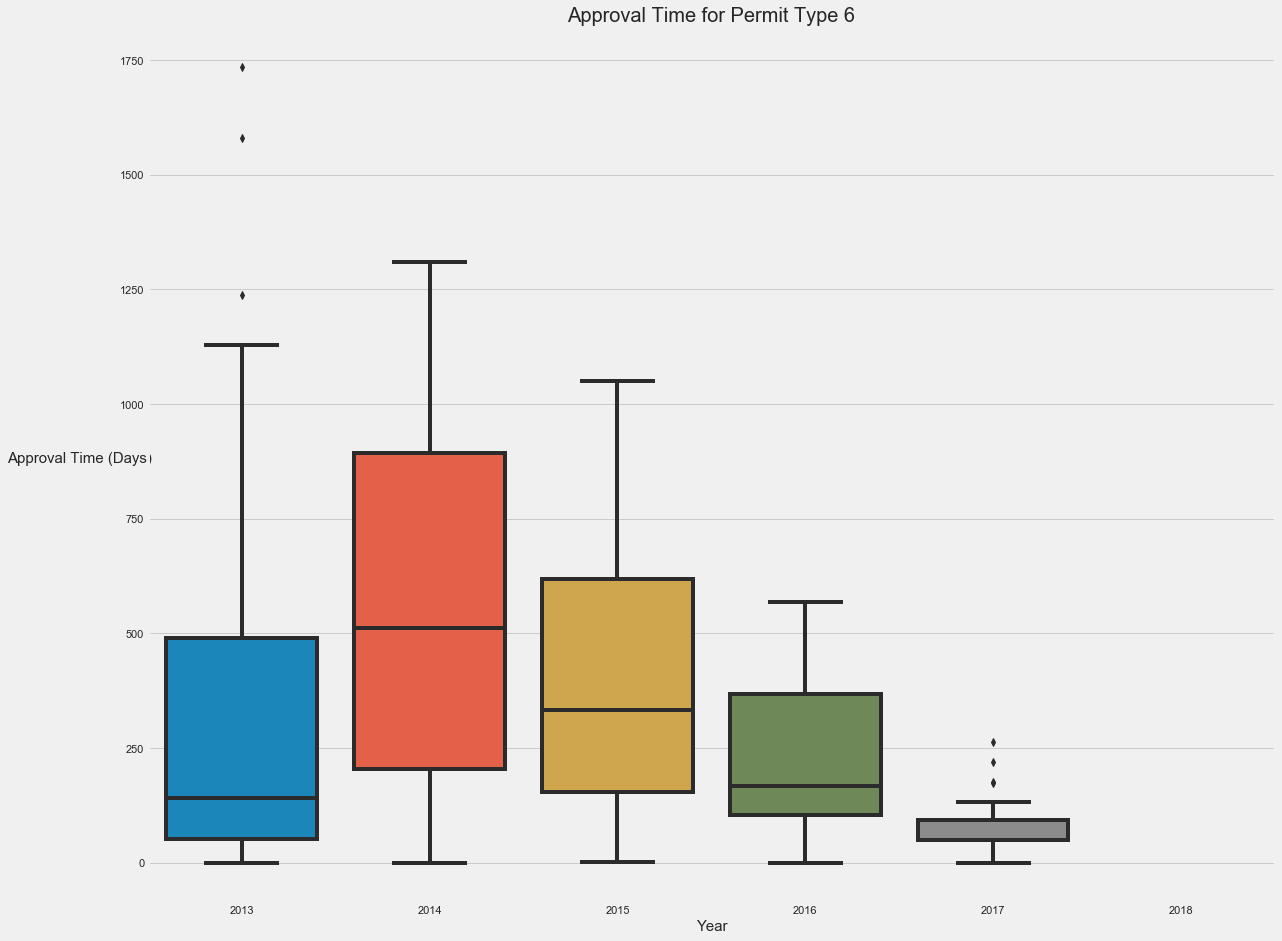

In [37]:
data = df[df.permit_type == 6]
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x=data.filed_date.dt.year, y='time_range', data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Approval Time for Permit Type 6", fontsize=20)
plt.show()

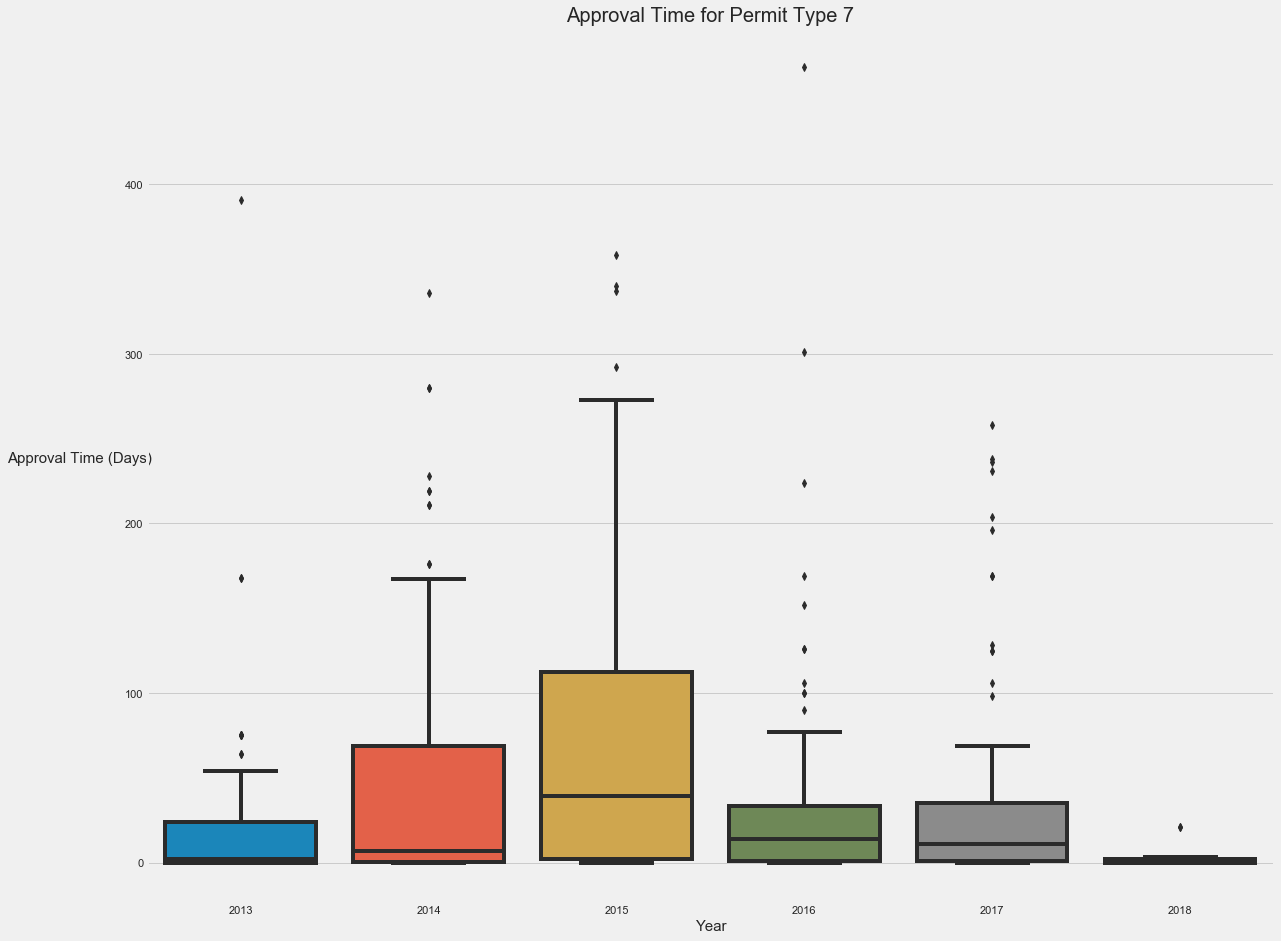

In [38]:
data = df[df.permit_type == 7]
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x=data.filed_date.dt.year, y='time_range', data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=45)
_ = plt.title(s="Approval Time for Permit Type 7", fontsize=20)
plt.show()

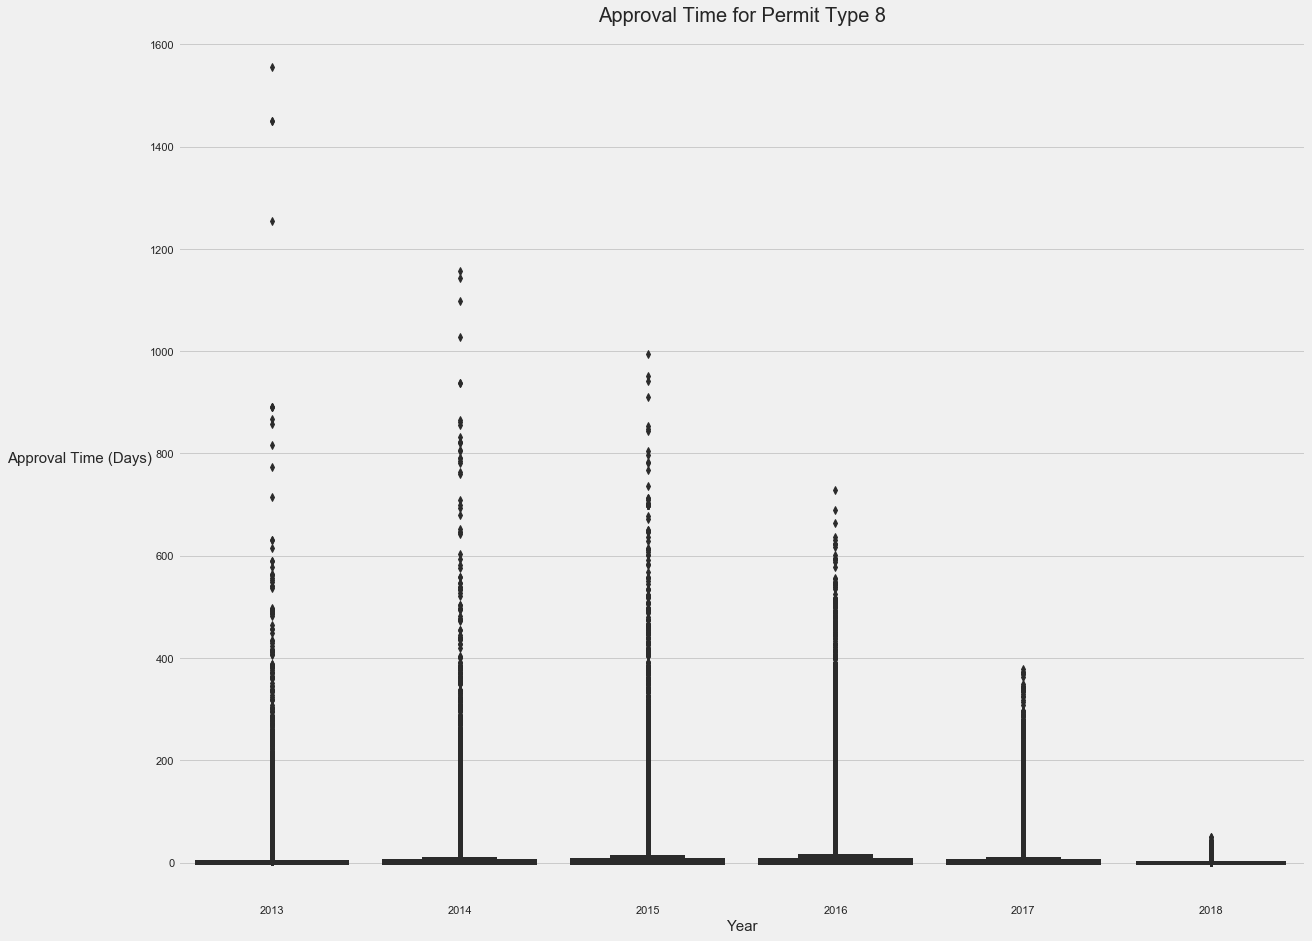

In [39]:
data = df[df.permit_type == 8]
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x=data.filed_date.dt.year, y='time_range', data=data)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=70)
_ = plt.title(s="Approval Time for Permit Type 8", fontsize=20)
plt.show()

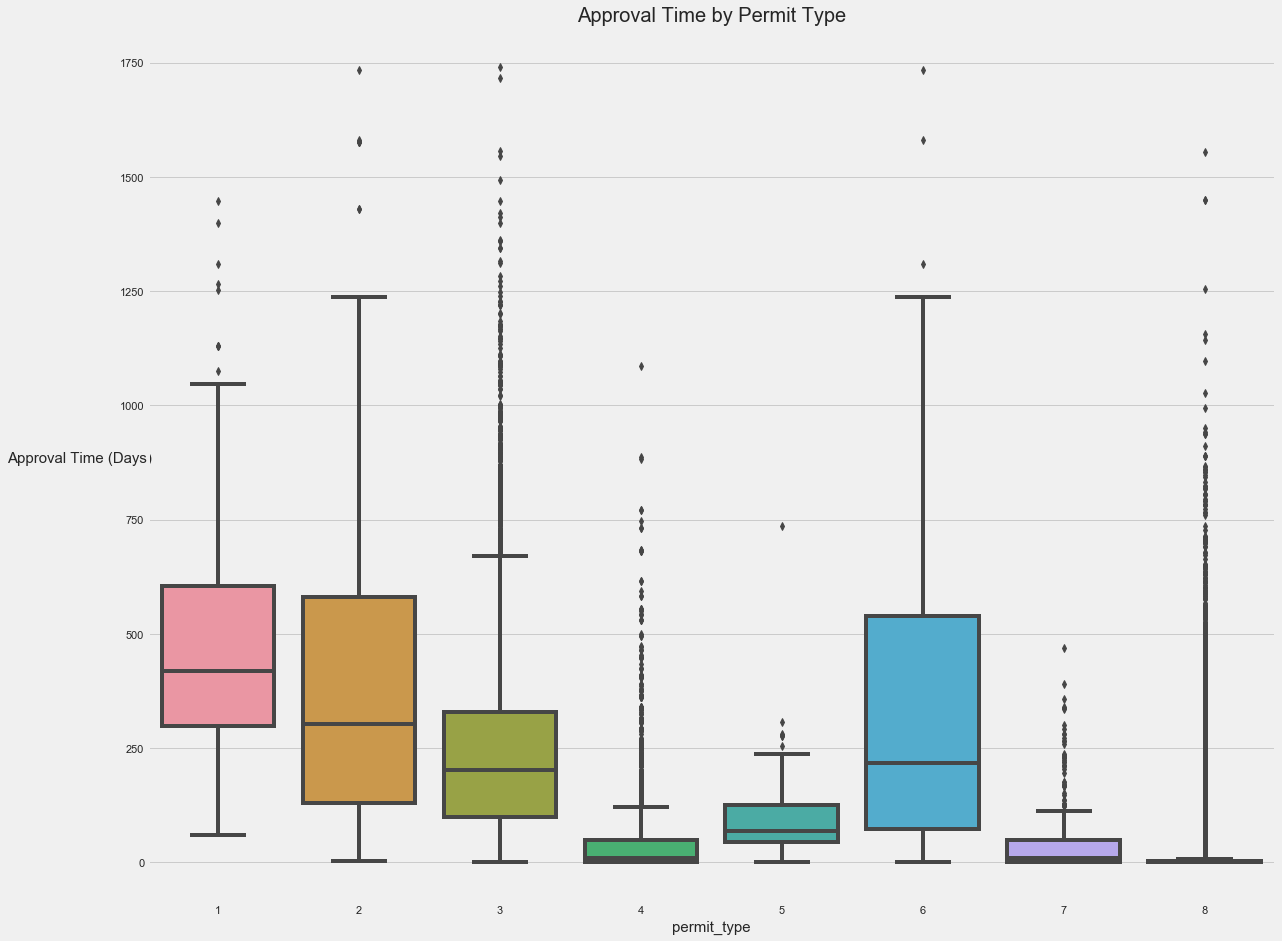

In [40]:
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x='permit_type', y='time_range', data=df)
_ = plt.xlabel(s="permit_type", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Approval Time by Permit Type", fontsize=20)
plt.show()

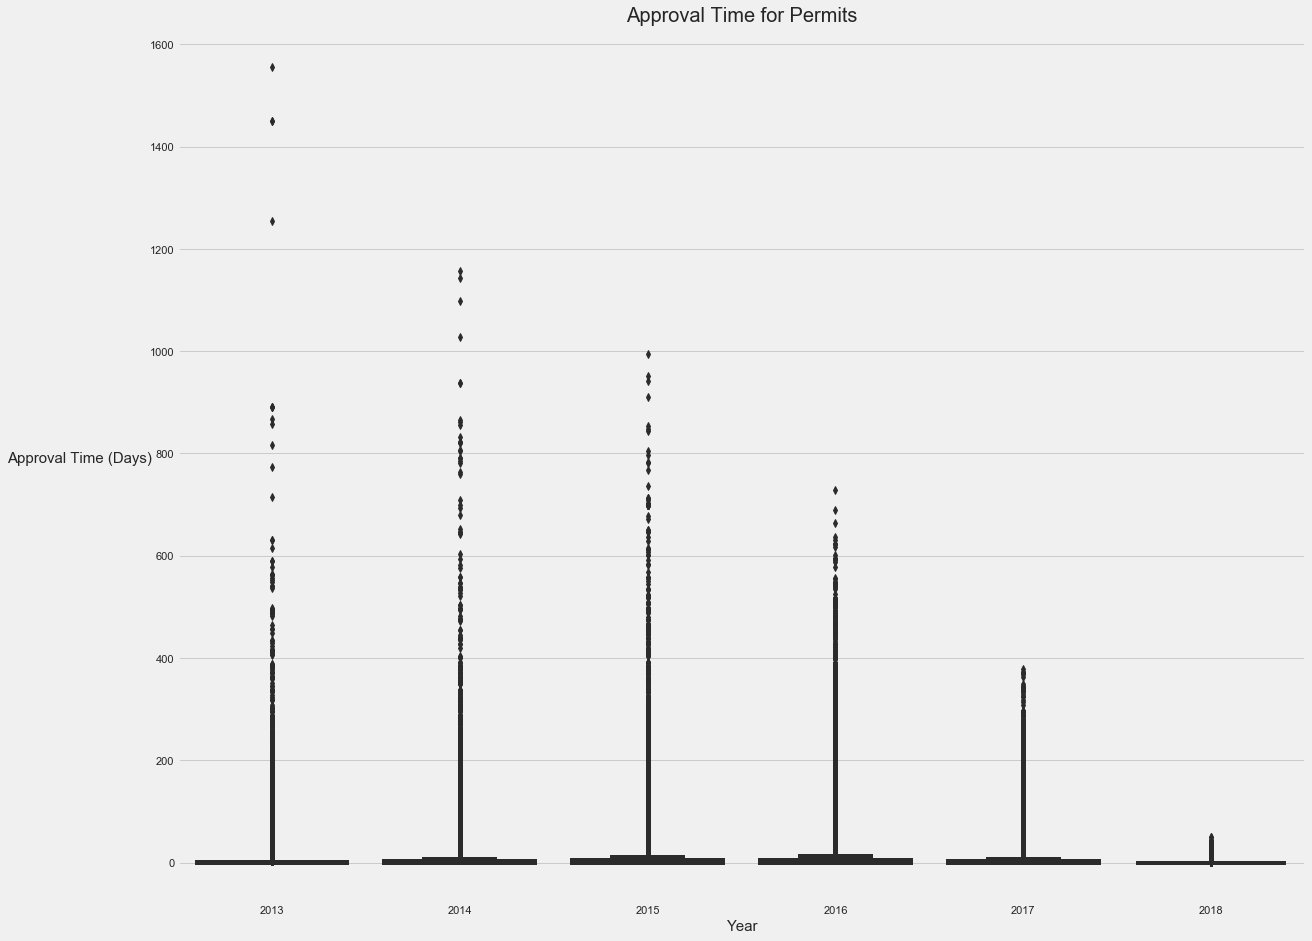

In [41]:
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x=data.filed_date.dt.year, y='time_range', data=df)
_ = plt.xlabel(s="Year", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=70)
_ = plt.title(s="Approval Time for Permits", fontsize=20)
plt.show()

After taking a detailed view of time range vs each permit type and then looking at the overall view of time range vs all permit type in each year, the graphs show that the time range for permit approval has been steadily decreasing. Also for some of the permit types, if you see the median approval time in each year shows a concave parabola. 

### Distribution of approval time 

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


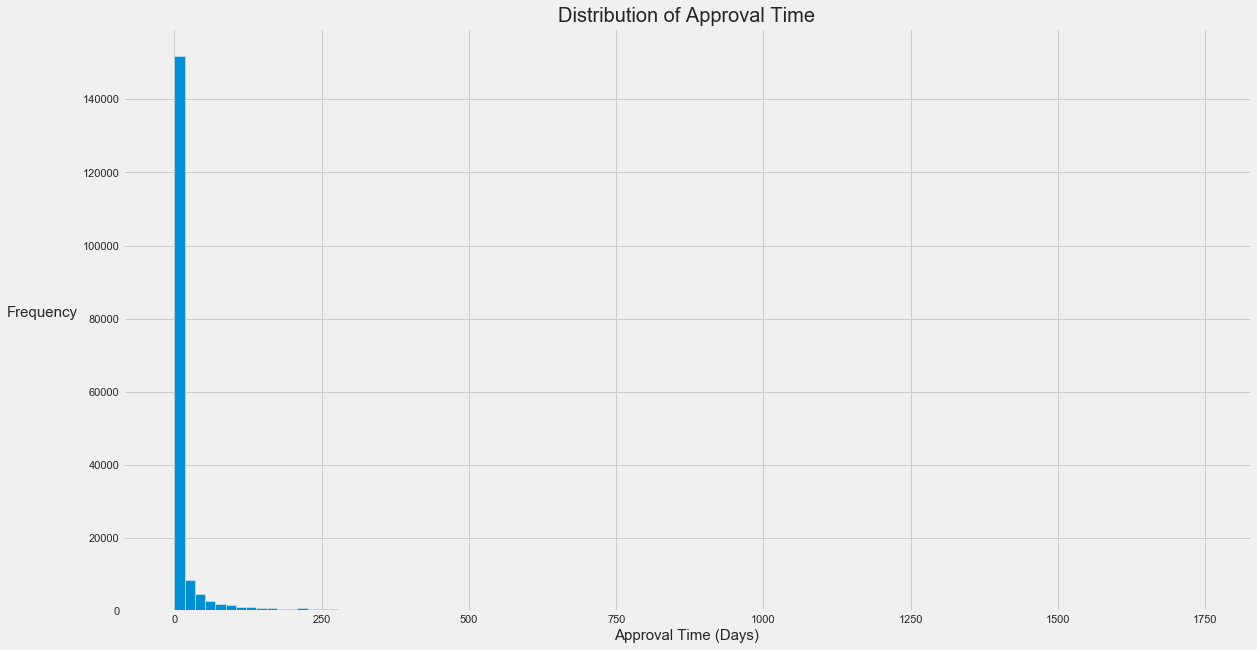

In [42]:
plt.figure(figsize=(18, 10))
_ = plt.hist(x='time_range', bins=100, data=df, range=(0.0, 1740.0))
_ = plt.xlabel("Approval Time (Days)", fontsize=15)
_ = plt.ylabel("Frequency", fontsize=15, rotation=0, labelpad=40)
_ = plt.title("Distribution of Approval Time", fontsize=20)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


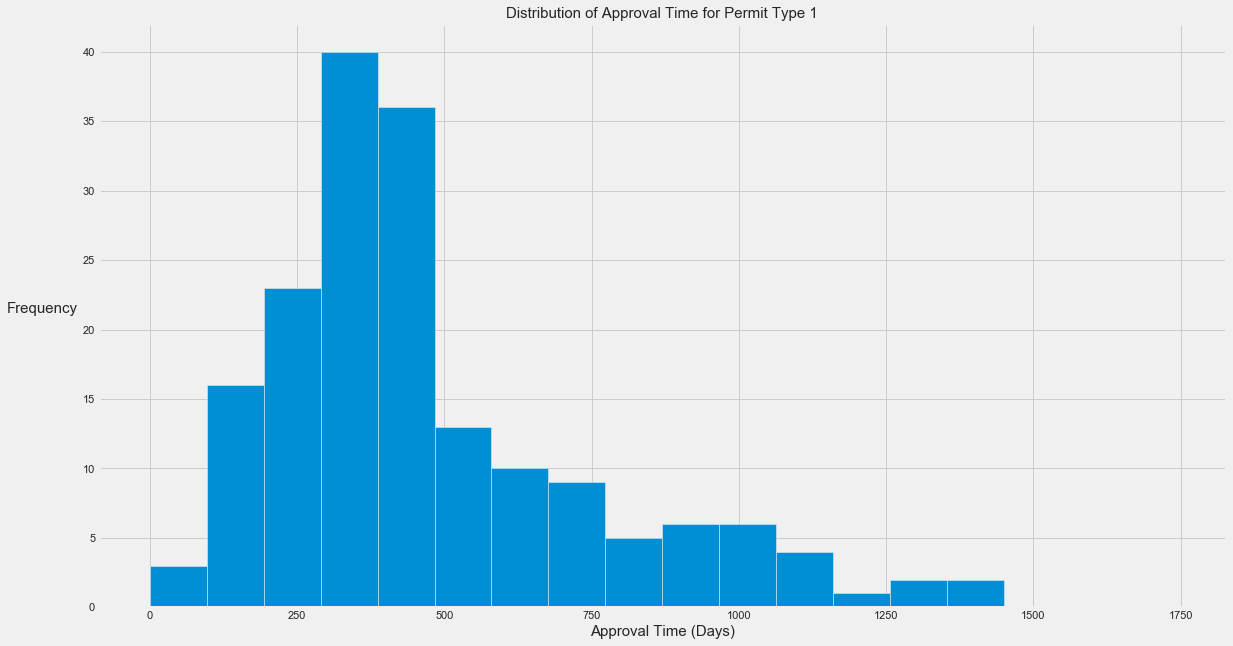

In [43]:
data = df[df.permit_type == 1]
plt.figure(figsize=(18, 10))
bins = int(np.sqrt(len(data)))
_ = plt.hist(x='time_range', bins=bins, data=data, range=(0.0, 1740.0))
_ = plt.xlabel("Approval Time (Days)", fontsize=15)
_ = plt.ylabel("Frequency", fontsize=15, rotation=0, labelpad=40)
_ = plt.title("Distribution of Approval Time for Permit Type 1", fontsize=15)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


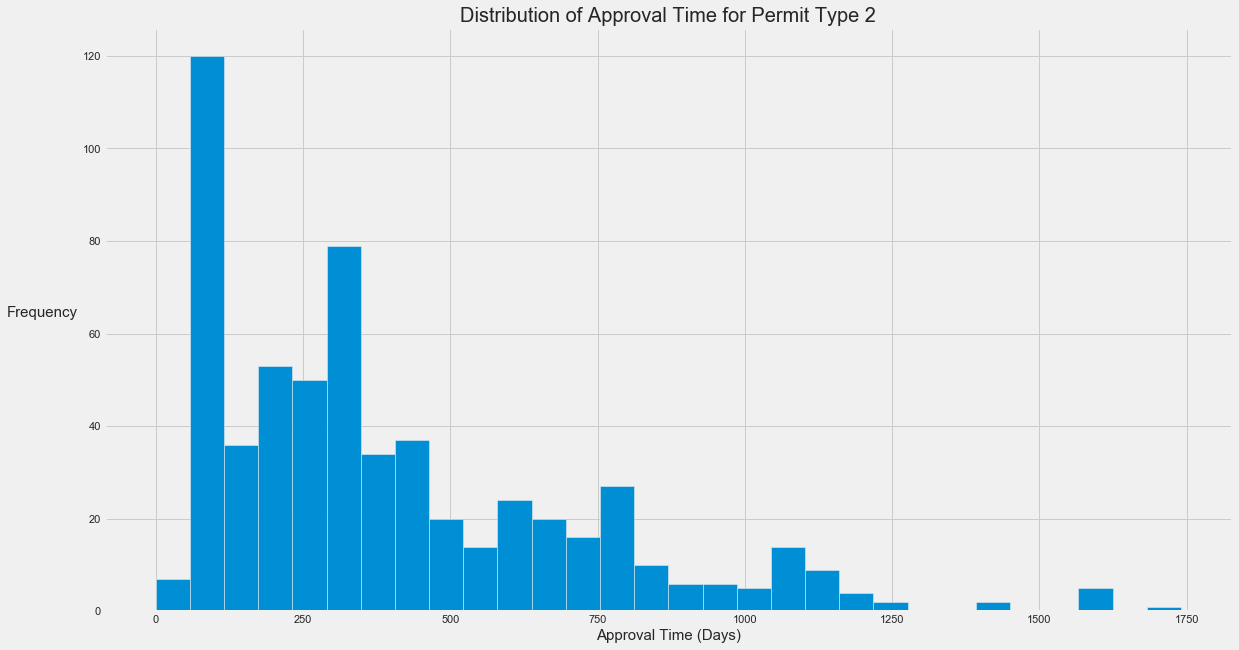

In [44]:
data = df[df.permit_type == 2]
plt.figure(figsize=(18, 10))
bins = int(np.sqrt(len(data)))
_ = plt.hist(x='time_range', bins=bins, data=data, range=(0.0, 1740.0))
_ = plt.xlabel("Approval Time (Days)", fontsize=15)
_ = plt.ylabel("Frequency", fontsize=15, rotation=0, labelpad=40)
_ = plt.title("Distribution of Approval Time for Permit Type 2", fontsize=20)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


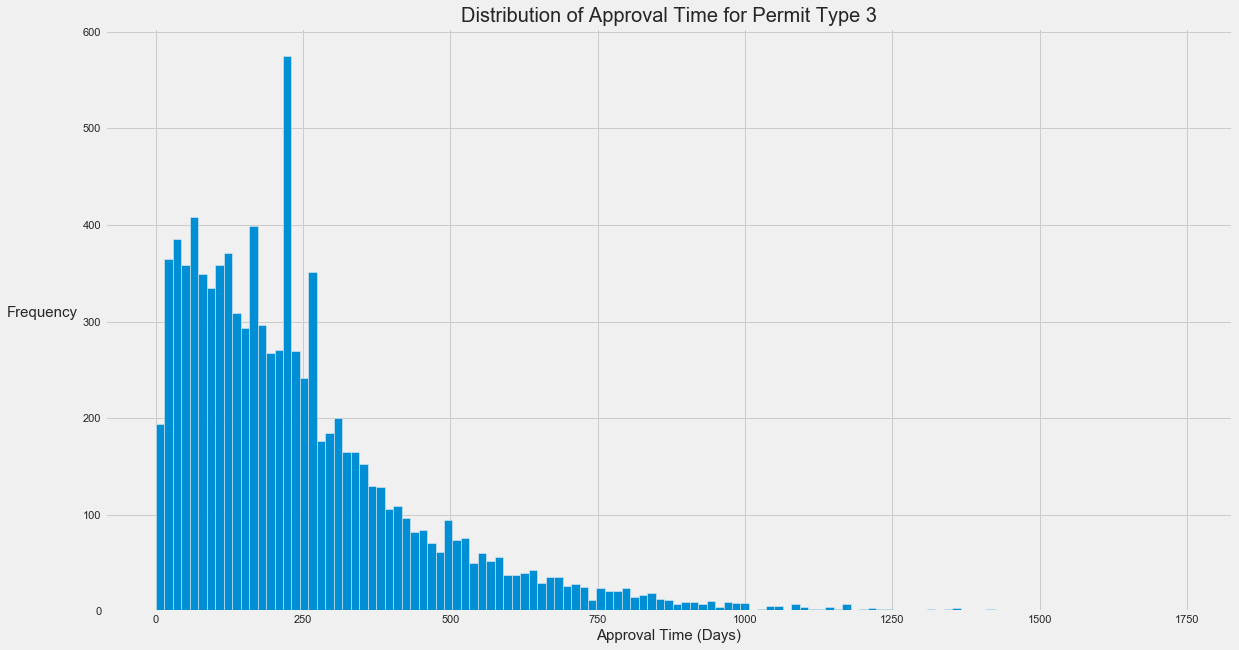

In [45]:
data = df[df.permit_type == 3]
plt.figure(figsize=(18, 10))
bins = int(np.sqrt(len(data)))
_ = plt.hist(x='time_range', bins=bins, data=data, range=(0.0, 1740.0))
_ = plt.xlabel("Approval Time (Days)", fontsize=15)
_ = plt.ylabel("Frequency", fontsize=15, rotation=0, labelpad=40)
_ = plt.title("Distribution of Approval Time for Permit Type 3", fontsize=20)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


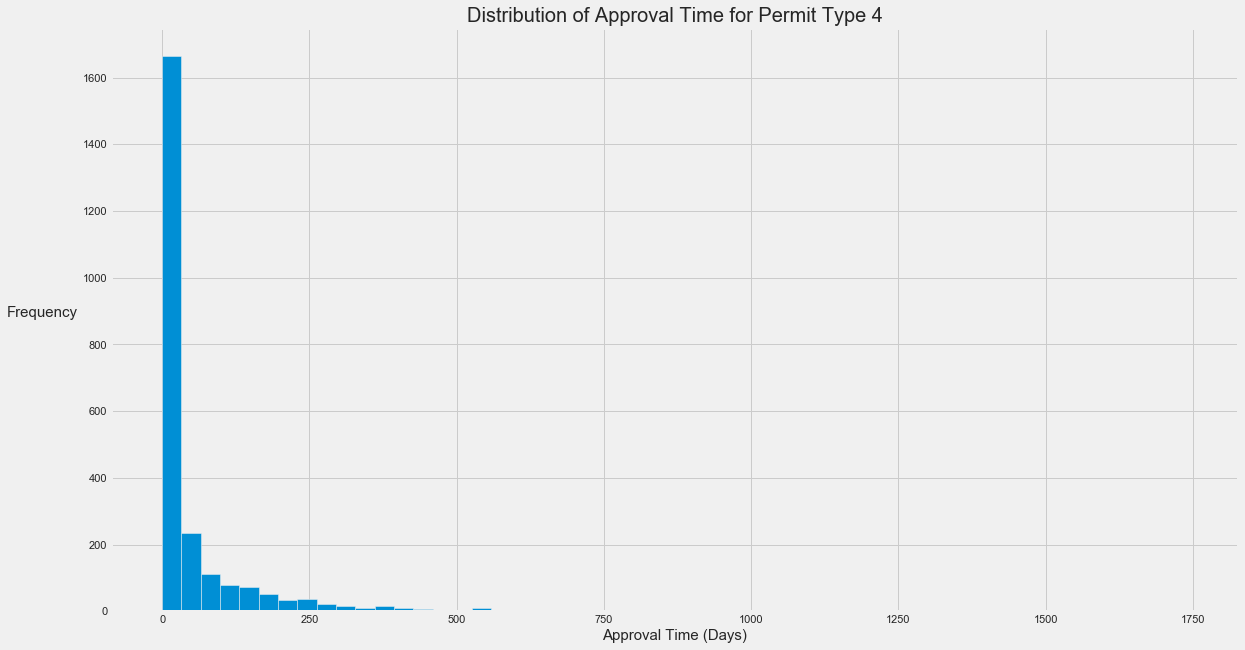

In [46]:
data = df[df.permit_type == 4]
plt.figure(figsize=(18, 10))
bins = int(np.sqrt(len(data)))
_ = plt.hist(x='time_range', bins=bins, data=data, range=(0.0, 1740.0))
_ = plt.xlabel("Approval Time (Days)", fontsize=15)
_ = plt.ylabel("Frequency", fontsize=15, rotation=0, labelpad=40)
_ = plt.title("Distribution of Approval Time for Permit Type 4", fontsize=20)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


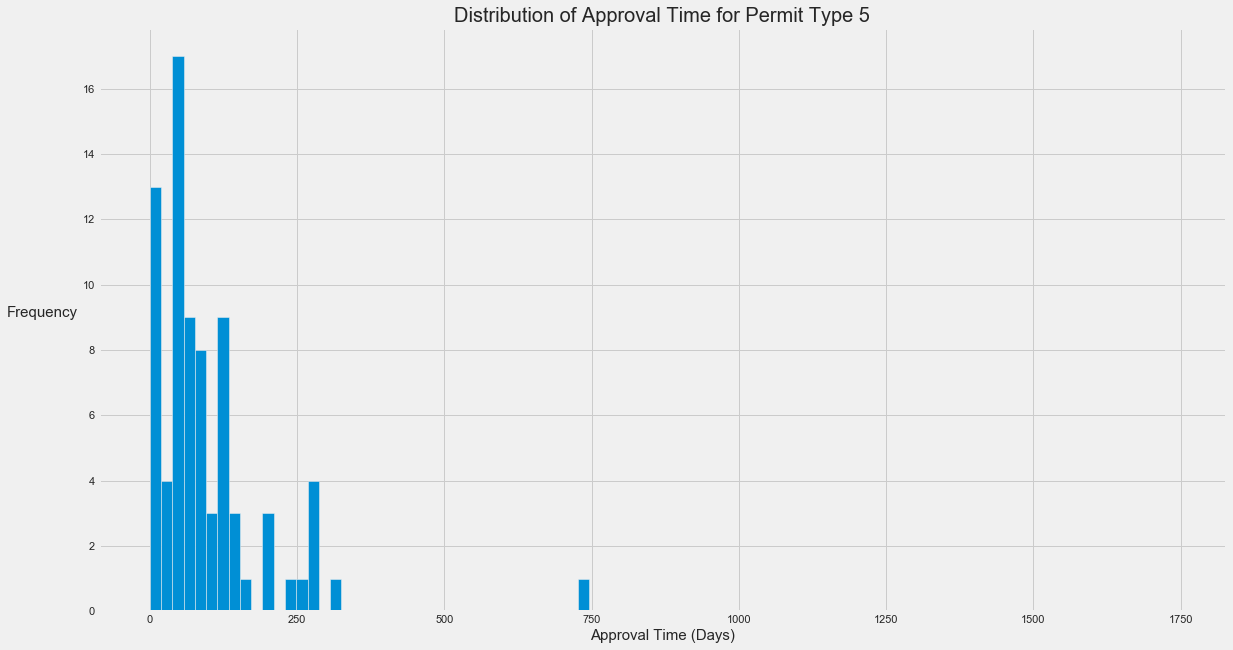

In [47]:
data = df[df.permit_type == 5]
plt.figure(figsize=(18, 10))
bins = int(np.sqrt(len(data)))
_ = plt.hist(x='time_range', bins=91, data=data, range=(0.0, 1740.0))
_ = plt.xlabel("Approval Time (Days)", fontsize=15)
_ = plt.ylabel("Frequency", fontsize=15, rotation=0, labelpad=40)
_ = plt.title("Distribution of Approval Time for Permit Type 5", fontsize=20)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


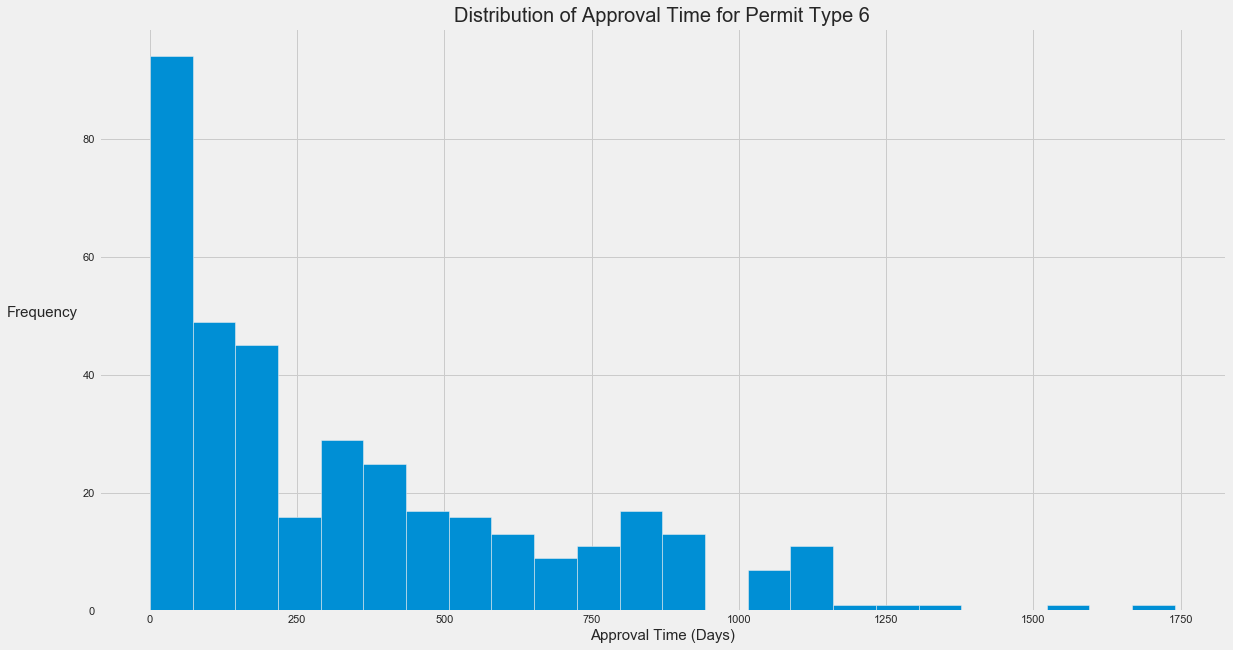

In [48]:
data = df[df.permit_type == 6]
plt.figure(figsize=(18, 10))
bins = int(np.sqrt(len(data)))
_ = plt.hist(x='time_range', bins=bins, data=data, range=(0.0, 1740.0))
_ = plt.xlabel("Approval Time (Days)", fontsize=15)
_ = plt.ylabel("Frequency", fontsize=15, rotation=0, labelpad=40)
_ = plt.title("Distribution of Approval Time for Permit Type 6", fontsize=20)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


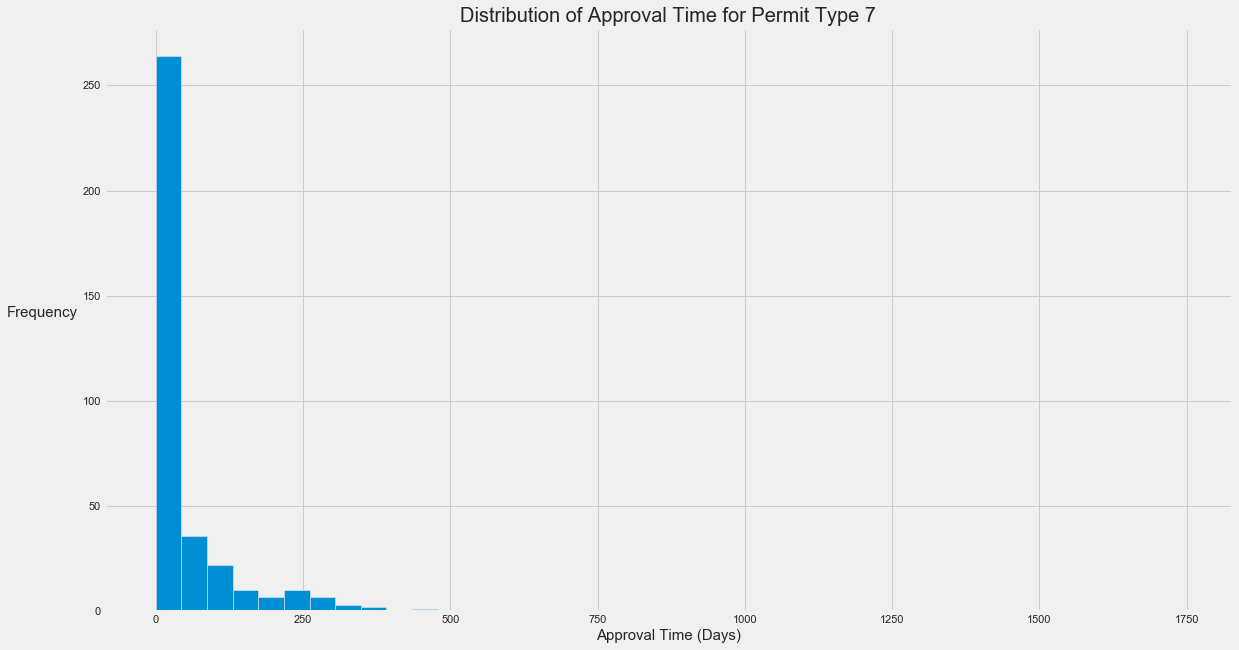

In [49]:
data = df[df.permit_type == 7]
plt.figure(figsize=(18, 10))
bins = int(np.sqrt(len(data)))
_ = plt.hist(x='time_range', bins=40, data=data, range=(0.0, 1740.0))
_ = plt.xlabel("Approval Time (Days)", fontsize=15)
_ = plt.ylabel("Frequency", fontsize=15, rotation=0, labelpad=40)
_ = plt.title("Distribution of Approval Time for Permit Type 7", fontsize=20)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


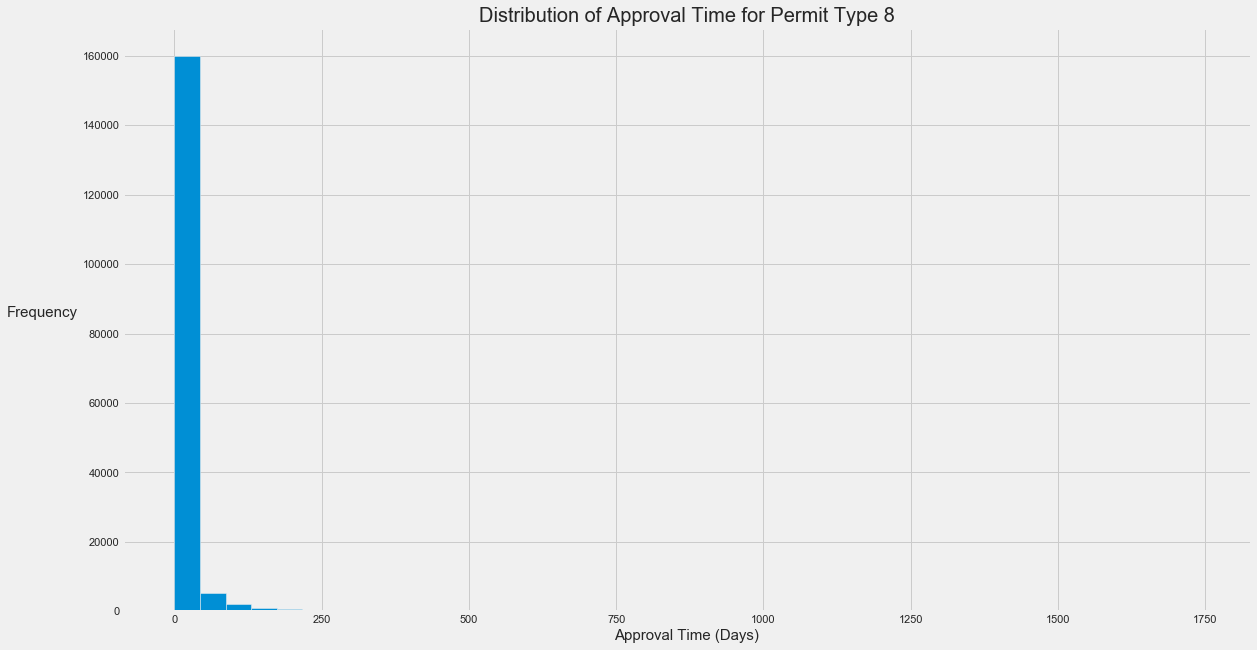

In [50]:
data = df[df.permit_type == 8]
plt.figure(figsize=(18, 10))
bins = int(np.sqrt(len(data)))
_ = plt.hist(x='time_range', bins=40, data=data, range=(0.0, 1740.0))
_ = plt.xlabel("Approval Time (Days)", fontsize=15)
_ = plt.ylabel("Frequency", fontsize=15, rotation=0, labelpad=40)
_ = plt.title("Distribution of Approval Time for Permit Type 8", fontsize=20)
plt.show()

All of the histograms show that most of the permits were approved in fewer than 60 days. We can verify this with looking at the quantiles. 

In [51]:
df['time_range'].quantile([.5,.75,.80,.90,.91,.92,.93,.94,.95,.96,.97,.98,.99])

0.50      0.00
0.75      6.00
0.80     13.00
0.90     56.00
0.91     68.00
0.92     82.00
0.93    100.00
0.94    126.00
0.95    159.00
0.96    204.00
0.97    251.00
0.98    326.00
0.99    471.82
Name: time_range, dtype: float64

From the qauntiles above, 75% of the data has an approval time of 6 days and below. Moreover, 90% of all of the approved permits were approved within 56 days. From boxplots and the histograms, the biggest contributor to these small approval times come from permits with type 8, which are otc alteration permits (over-the-counter alteration permits). 

### Questions to investigate further:
1. Which zipcode had the longest approval times?
2. Which zipcode had the most denials?
3. What kinds of permits were filed in 94110? Look at the approval times.  

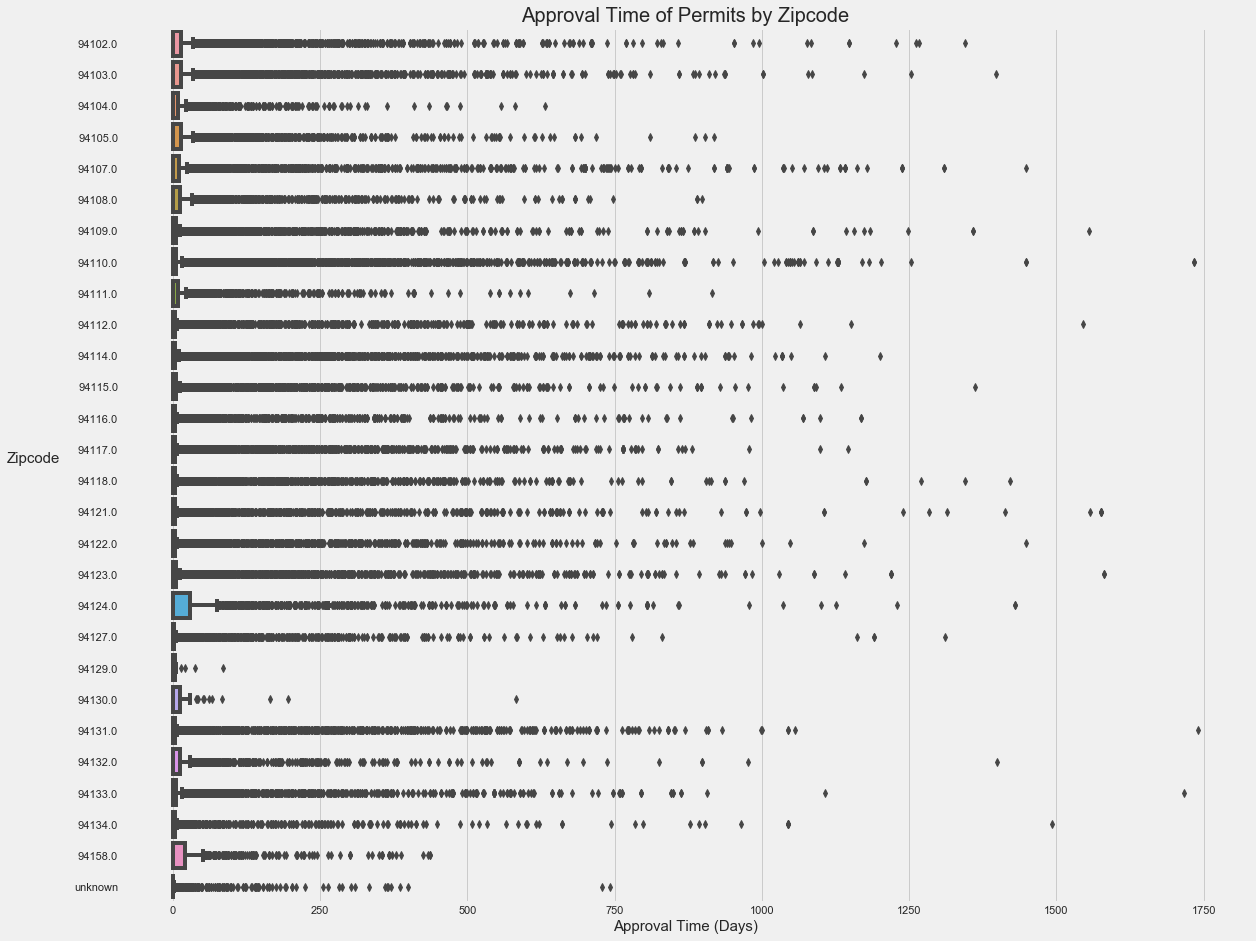

In [52]:
plt.figure(figsize=(18,15))
_ = sb.boxplot(x='time_range', y='zipcode', data=df)
_ = plt.xlabel('Approval Time (Days)', fontsize=15)
_ = plt.ylabel('Zipcode', fontsize=15, rotation=0, labelpad=40)
_ = plt.title('Approval Time of Permits by Zipcode', fontsize=20)
plt.show()

Zipcode 94124 had the the longest approval times. Zipcode 94129 had the shortest approval times. Zipcode 94131 had a permit filed with the largest approval time. 

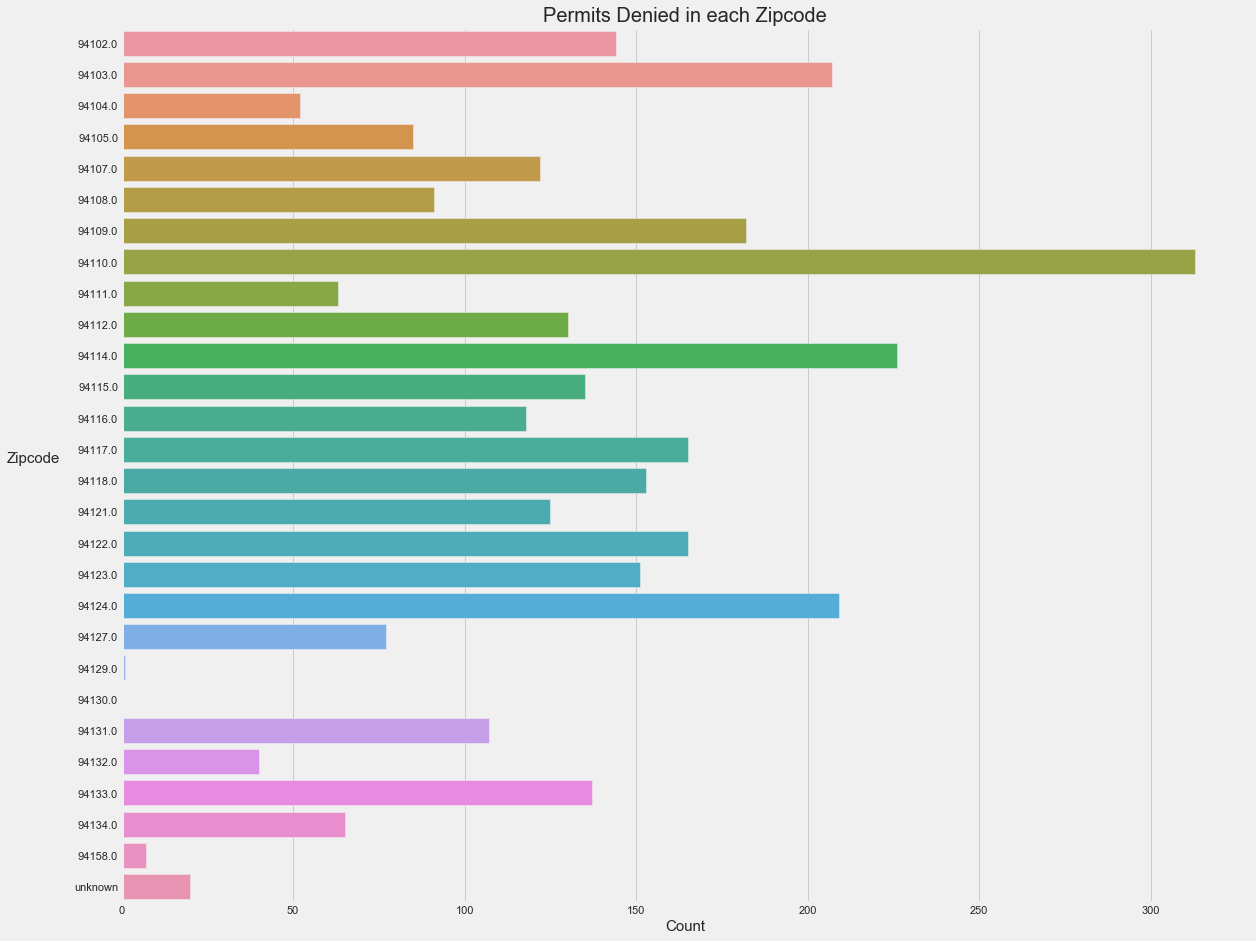

In [53]:
data = df[df.decision == 'denied']
plt.figure(figsize=(18,15))
_ = sb.countplot(y='zipcode', data=data)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Zipcode', fontsize=15, rotation=0, labelpad=40)
_ = plt.title('Permits Denied in each Zipcode', fontsize=20)
plt.show()

Zipcode 94110 had the most amount permits denied. 

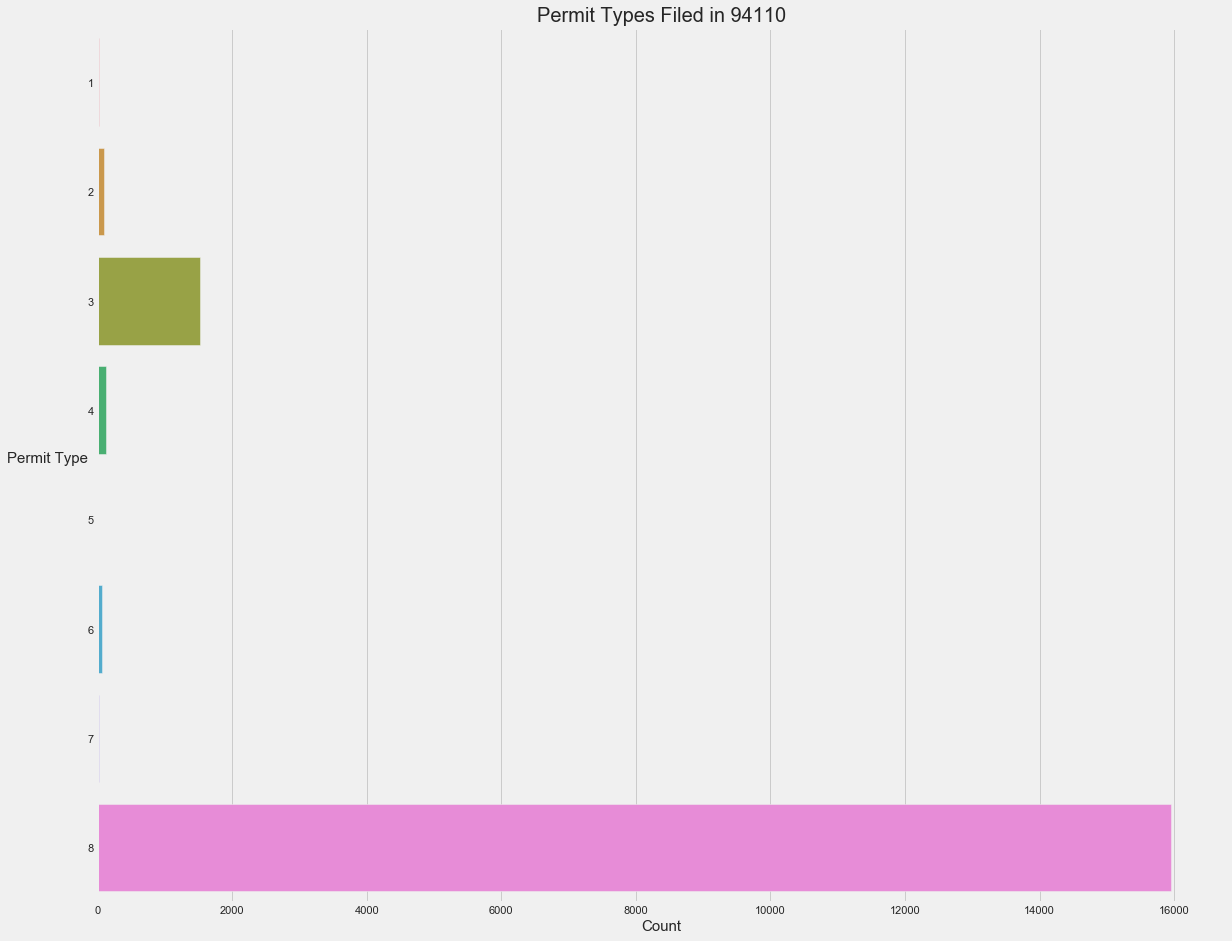

In [54]:
data = df[df.zipcode == '94110.0']
plt.figure(figsize=(18,15))
_ = sb.countplot(y='permit_type', data=data)
_ = plt.xlabel('Count', fontsize=15)
_ = plt.ylabel('Permit Type', fontsize=15, rotation=0, labelpad=40)
_ = plt.title('Permit Types Filed in 94110', fontsize=20)
plt.show()

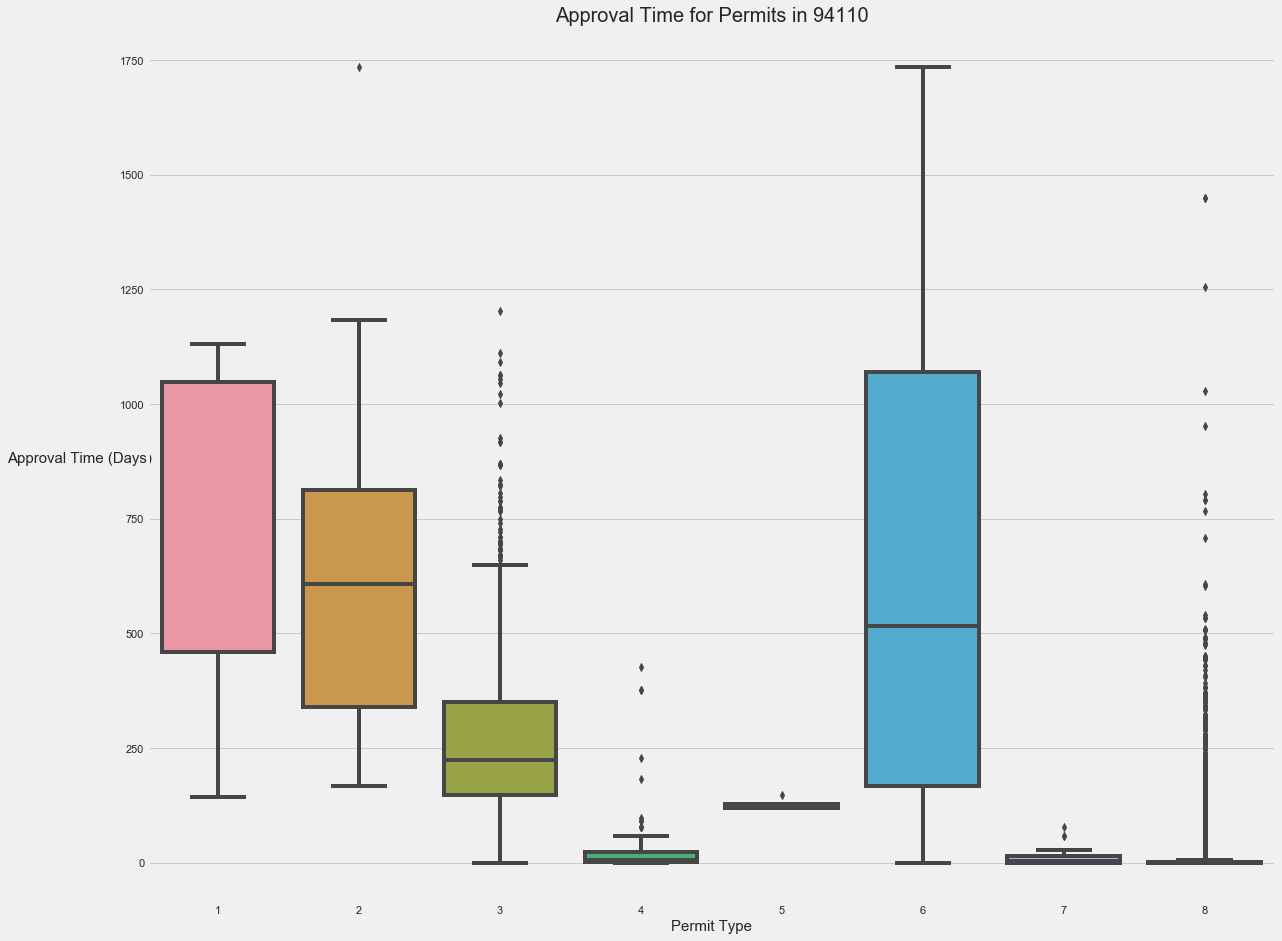

In [55]:
plt.figure(figsize=(18, 15))
_ = sb.boxplot(x='permit_type', y='time_range', data=data)
_ = plt.xlabel(s="Permit Type", fontsize=15)
_ = plt.ylabel(s="Approval Time (Days)", fontsize=15, rotation=0, labelpad=40)
_ = plt.title(s="Approval Time for Permits in 94110", fontsize=20)
plt.show()

It looks like over 90% of the permits filed in 94110 were of type 8. Permit type 6 had the longest approval time, followed by permit type 2. 